<a href="https://colab.research.google.com/github/hiddenkd/MIS-report/blob/main/MIS_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Rough work

In [237]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [238]:
import pandas as pd

In [239]:
!pip install pandas openpyxl

In [240]:
path = '/content/drive/MyDrive/official data.xlsx'

df = pd.read_excel(path, sheet_name='Assesment')  # name of 1st sheet out of 2 sheets

In [241]:
df.head(1)

,Timestamp,Sales SPOC,Primary Services,Exact Misc Services( Write Correct Misc Services),\nAmount,Remaining Amount,State
0,2024-08-09 10:44:15.433000,shamli sharman,OPC,"GST, MSME",5714,2448,Tamil Nadu


In [242]:
df_backup = df.copy()

• Now it's good to go.

### EDA ( exploratory data analysis )
• Going thorugh each column & analyzing it up.

In [243]:
df.shape

(4825, 7)

• 4825 rows...    7 coulmns

#### Timestamp

In [244]:

df['Timestamp'].isnull().sum()

12

• Total 12 empty places , what does it mean ?

• Lets have a look at them.

In [245]:
df[df['Timestamp'].isnull()==True].shape

(12, 7)

In [246]:
df[df['Timestamp'].isnull()==True]
# these are those empty rows.

,Timestamp,Sales SPOC,Primary Services,Exact Misc Services( Write Correct Misc Services),\nAmount,Remaining Amount,State
3511,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4814,NaN,NaN,NaN,NaN,NaN,6620,NaN
4815,NaN,NaN,NaN,NaN,NaN,10000,NaN
4816,NaN,NaN,,NaN,NaN,NaN,NaN
4817,NaN,NaN,,NaN,NaN,NaN,NaN
4818,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4819,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4820,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4821,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4822,NaN,NaN,NaN,NaN,NaN,NaN,NaN


• These rows are TOTALLY useless,

In [247]:
df = df[df['Timestamp'].notnull()]

In [248]:
df.shape

(4813, 7)

In [249]:
df[df['Timestamp'].isnull()==True].shape

(0, 7)

In [250]:
df_backup = df.shape

In [251]:
df['Timestamp'].head(1)

,Timestamp
0,2024-08-09 10:44:15.433000


In [252]:
df['Timestamp'] = df['Timestamp'].astype(str)

<ipython-input-252-45b9310fcfba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Timestamp'] = df['Timestamp'].astype(str)


In [253]:
df['Year'] = df['Timestamp'].str[:4]

<ipython-input-253-db115c07d053>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Timestamp'].str[:4]


In [254]:
df['Year'].head(1)

,Year
0,2024


In [255]:
df['Year'].unique()

array(['2024', '16/1', ' '], dtype=object)

In [256]:
df['Year'].value_counts()

,count
Year,
2024,4811
16/1,1
,1


In [257]:
df[df['Year']!= '2024']

,Timestamp,Sales SPOC,Primary Services,Exact Misc Services( Write Correct Misc Services),\nAmount,Remaining Amount,State,Year
3917,"16/10/2024 13:35:49""",mahima,Misc Services,Start-Up India,6500,15820,Jharkhand,16/1
4813,,gunaj khurana,LLP,"GST, MSME",1499,NaN,Maharashtra,


In [258]:
df['Timestamp'].tail(5)

,Timestamp
4809,2024-10-29 14:03:32.680000
4810,2024-10-29 14:12:28.945000
4811,2024-10-29 14:16:02.434000
4812,2024-10-29 14:22:37.480000
4813,


• It is clearly visible that , 'Timestamp' mentioned at index(3917) is in different format,

• And that Timestamp is missing from index(4813)

In [259]:
df[df['Timestamp']=='16/10/2024 13:35:49"']['Timestamp'] = '2024-10-16 10:44:15.433000'

<ipython-input-259-cb362e52599d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['Timestamp']=='16/10/2024 13:35:49"']['Timestamp'] = '2024-10-16 10:44:15.433000'


• Problem with above assignment ( it returns a view (not a copy) of the DataFrame)

In [260]:
df.loc[df['Timestamp'] == '16/10/2024 13:35:49"', 'Timestamp'] = '2024-10-16 10:44:15.433000'

In [261]:
df[df['Timestamp']=='16/10/2024 13:35:49"']

,Timestamp,Sales SPOC,Primary Services,Exact Misc Services( Write Correct Misc Services),\nAmount,Remaining Amount,State,Year


In [262]:
df['Year'] = df['Timestamp'].str[:4]

In [263]:
df['Year'].value_counts()

,count
Year,
2024,4812
,1


In [264]:
df[df['Year']==' ']

,Timestamp,Sales SPOC,Primary Services,Exact Misc Services( Write Correct Misc Services),\nAmount,Remaining Amount,State,Year
4813,,gunaj khurana,LLP,"GST, MSME",1499,NaN,Maharashtra,


• NOw desire to fill this blank

• Searching for timestamps for gunjan Khurana ( will handle it later )

• as year is 2024 in all i can drop it

In [265]:
df = df.drop(columns=['Year'])
df.head(1)

,Timestamp,Sales SPOC,Primary Services,Exact Misc Services( Write Correct Misc Services),\nAmount,Remaining Amount,State
0,2024-08-09 10:44:15.433000,shamli sharman,OPC,"GST, MSME",5714,2448,Tamil Nadu


In [266]:
df['Month'] = df['Timestamp'].str[5:7]

In [267]:
df['Month'].value_counts()

,count
Month,
10,1774
09,1764
08,1274
,1


• Aug / Sep / Oct

In [268]:
df['date'] = df['Timestamp'].str[8:10]

In [269]:
df['date'].value_counts()

,count
date,
28,250
23,230
14,229
16,225
26,212
21,205
09,202
24,196
30,189


• All looks good

• Just want to check for, weather [ 31st Sep ] is present or not.  Sep is till 30 only.

In [270]:
df[(df['Month'] == '09') & (df['date'] == '31')]

,Timestamp,Sales SPOC,Primary Services,Exact Misc Services( Write Correct Misc Services),\nAmount,Remaining Amount,State,Month,date


• Yes this mistake is not presnt.

• the format 10:44:15.433000 represents:

10 hours
44 minutes
15 seconds
433000 microseconds

• I Feel just hour is imp.

In [271]:
df['Hr'] = df['Timestamp'].str[11:13]

In [272]:
df['Hr'].head()

,Hr
0,10
1,11
2,11
3,11
4,11


In [273]:
df['Hr'].max()

'23'

In [274]:
df['Hr'].sort_values().head(2)

,Hr
4813,
2624,00


In [275]:
df.head(1)

,Timestamp,Sales SPOC,Primary Services,Exact Misc Services( Write Correct Misc Services),\nAmount,Remaining Amount,State,Month,date,Hr
0,2024-08-09 10:44:15.433000,shamli sharman,OPC,"GST, MSME",5714,2448,Tamil Nadu,08,09,10


• I wil remove 'Timestamp' column later

In [276]:
# df = df.drop(columns=['Timestamp'])

#### Sales SPOC



In [277]:
df['Sales SPOC'].isnull().sum()

1

In [278]:
df[df['Sales SPOC'].isnull()]

,Timestamp,Sales SPOC,Primary Services,Exact Misc Services( Write Correct Misc Services),\nAmount,Remaining Amount,State,Month,date,Hr
3888,2024-10-16 09:56:08.023000,NaN,Private,Only PVT registration,5000,4865,Punjab,10,16,09


In [279]:
df['Sales SPOC'].info()

<class 'pandas.core.series.Series'>
Index: 4813 entries, 0 to 4813
Series name: Sales SPOC
Non-Null Count  Dtype 
--------------  ----- 
4812 non-null   object
dtypes: object(1)
memory usage: 75.2+ KB


In [280]:
df['Sales SPOC'] = df['Sales SPOC'].fillna('').astype(str)

* Upper case - lower case will be a problem.

In [281]:
df['Sales SPOC'] = df['Sales SPOC'].str.lower()

In [282]:
df['Sales SPOC'].sample(5)

,Sales SPOC
517,lata
1229,yash suri
2214,lata
772,laxmi
1488,shubham loya


In [283]:
import numpy as np
sorted_values = np.sort(df['Sales SPOC'].unique())
print(sorted_values)

['' ' ' ' s shreyas' 'aarzoo' 'aarzoo ' 'aarzoom' 'abhay shukla'
 'abhilasha' 'abhilasha ' 'abhilasha tyagi' 'abhishek kumar gupta' 'aditi'
 'aditi k' 'ahana' 'ahana ' 'ahana patnayak' 'ahana patnayak ' 'akshay'
 'akshay ' 'amogh' 'amogh ' 'amogh gupta' 'animesh singh rathore'
 'anjali chauhan' 'ankit ' 'ankit daral' 'ankit2' 'ansh' 'ansh mishra'
 'ansh mishra ' 'anshdeep kaur' 'arshdeep singh' 'arun' 'ashish mamtani'
 'ashish mamtani ' 'ashu' 'ashwini' 'ashwini kumar sharm'
 'ashwini kumar sharma' 'ashwini kumar sharma ' 'aswini kumar sirigiri'
 'auto' 'avantika' 'avantika saxena' 'basil' 'devdutt' 'devidutta '
 'devidutta dash' 'dhruv chauhan' 'divya raushan' 'drishay arora'
 'firdous' 'firdous ' 'firdous alam' 'gunaj' 'gunaj ' 'gunaj khuarana'
 'gunaj khurana' 'gunaj kurana' 'gurpreeet' 'gurpreet' 'gurpreet '
 'gursimar' 'gursimar ' 'ha' 'hardeep' 'harsh somani' 'harsit singh'
 'himanshi' 'indrajeet' 'indrajeet sharma' 'jaywant goswami'
 'jaywant goswami ' 'karan shingari' 'kashish 

* Too much problems with these names.

In [284]:
df[df['Sales SPOC'].str.endswith(' s shreyas', na=False)].shape[0]

4

In [285]:
df[df['Sales SPOC'].str.endswith('s shreyas', na=False)].shape[0]

100

In [286]:
df[df['Sales SPOC'].str.endswith('shreyas', na=False)].shape[0]

106

* 3 diff naming for same name.

In [287]:
df[df['Sales SPOC'].isnull()]

,Timestamp,Sales SPOC,Primary Services,Exact Misc Services( Write Correct Misc Services),\nAmount,Remaining Amount,State,Month,date,Hr


In [288]:
df.sort_values(by='Sales SPOC', ascending=True).head(4)

,Timestamp,Sales SPOC,Primary Services,Exact Misc Services( Write Correct Misc Services),\nAmount,Remaining Amount,State,Month,date,Hr
3888,2024-10-16 09:56:08.023000,,Private,Only PVT registration,5000,4865,Punjab,10,16,09
3672,2024-10-12 11:24:35.916000,,OPC,"GST, MSME",8309,NaN,Uttar Pradesh,10,12,11
3992,2024-10-17 13:04:09.749000,,LLP,"GST, MSME",7865,0,Delhi,10,17,13
2481,2024-09-23 10:48:05.481000,s shreyas,Misc Services,2nd Instalment,3665,NaN,Andhra Pradesh,09,23,10


In [289]:
df[df['Sales SPOC']== '']

,Timestamp,Sales SPOC,Primary Services,Exact Misc Services( Write Correct Misc Services),\nAmount,Remaining Amount,State,Month,date,Hr
3888,2024-10-16 09:56:08.023000,,Private,Only PVT registration,5000,4865,Punjab,10,16,09


In [290]:
df[df['Sales SPOC']== ' ']

,Timestamp,Sales SPOC,Primary Services,Exact Misc Services( Write Correct Misc Services),\nAmount,Remaining Amount,State,Month,date,Hr
3672,2024-10-12 11:24:35.916000,,OPC,"GST, MSME",8309,NaN,Uttar Pradesh,10,12,11
3992,2024-10-17 13:04:09.749000,,LLP,"GST, MSME",7865,0,Delhi,10,17,13


In [291]:
df.loc[df['Sales SPOC'] == ' ', 'Sales SPOC'] = 'not known'

In [292]:
df.loc[df['Sales SPOC'] == '', 'Sales SPOC'] = 'not known'

In [293]:
df[df['Sales SPOC']== 'not known']

,Timestamp,Sales SPOC,Primary Services,Exact Misc Services( Write Correct Misc Services),\nAmount,Remaining Amount,State,Month,date,Hr
3672,2024-10-12 11:24:35.916000,not known,OPC,"GST, MSME",8309,NaN,Uttar Pradesh,10,12,11
3888,2024-10-16 09:56:08.023000,not known,Private,Only PVT registration,5000,4865,Punjab,10,16,09
3992,2024-10-17 13:04:09.749000,not known,LLP,"GST, MSME",7865,0,Delhi,10,17,13


In [294]:
patterns = [
    's sheryas', 's shreyas', 's shreyas ', 's shreyass',
    'shreyas', 'shreyas ', ' s shreyas'
]
regex_pattern = '|'.join(patterns)
df[df['Sales SPOC'].str.contains(regex_pattern, case=False, na=False)]

,Timestamp,Sales SPOC,Primary Services,Exact Misc Services( Write Correct Misc Services),\nAmount,Remaining Amount,State,Month,date,Hr
1,2024-08-09 11:08:30.321000,s shreyas,Private,"Start-Up India, Trademark",10499,8953,Uttar Pradesh,08,09,11
313,2024-08-16 10:12:20.353000,s shreyas,LLP,Others,3933,NaN,Delhi,08,16,10
316,2024-08-16 10:16:36.806000,s shreyas,Private,GST,8500,0,Bihar,08,16,10
375,2024-08-16 19:01:25.575000,shreyas,Others Misc. Services,Start-Up India,3500,0,Kerala,08,16,19
427,2024-08-18 23:29:22.120000,shreyas,Private,"GST, Virtual office",21099,NaN,Delhi,08,18,23
...,...,...,...,...,...,...,...,...,...,...
4546,2024-10-25 17:25:10.209000,s shreyas,OPC,"GST, MSME",8309,20000,Uttar Pradesh,10,25,17
4610,2024-10-26 16:26:03.830000,s shreyas,LLP,Others,1499,25000,Delhi,10,26,16
4688,2024-10-28 12:39:12.530000,s shreyas,LLP,"GST, MSME",6959,5366,Delhi,10,28,12
4698,2024-10-28 13:35:14.053000,s shreyas,Private,NaN,7659,0,Delhi,10,28,13


In [295]:
df['Sales SPOC'] = df['Sales SPOC'].str.replace(regex_pattern, 'shreyash', case=False, regex=True)

In [296]:
np.sort(df['Sales SPOC'].unique())

array(['aarzoo', 'aarzoo ', 'aarzoom', 'abhay shukla', 'abhilasha',
       'abhilasha ', 'abhilasha tyagi', 'abhishek kumar gupta', 'aditi',
       'aditi k', 'ahana', 'ahana ', 'ahana patnayak', 'ahana patnayak ',
       'akshay', 'akshay ', 'amogh', 'amogh ', 'amogh gupta',
       'animesh singh rathore', 'anjali chauhan', 'ankit ', 'ankit daral',
       'ankit2', 'ansh', 'ansh mishra', 'ansh mishra ', 'anshdeep kaur',
       'arshdeep singh', 'arun', 'ashish mamtani', 'ashish mamtani ',
       'ashu', 'ashwini', 'ashwini kumar sharm', 'ashwini kumar sharma',
       'ashwini kumar sharma ', 'aswini kumar sirigiri', 'auto',
       'avantika', 'avantika saxena', 'basil', 'devdutt', 'devidutta ',
       'devidutta dash', 'dhruv chauhan', 'divya raushan',
       'drishay arora', 'firdous', 'firdous ', 'firdous alam', 'gunaj',
       'gunaj ', 'gunaj khuarana', 'gunaj khurana', 'gunaj kurana',
       'gurpreeet', 'gurpreet', 'gurpreet ', 'gursimar', 'gursimar ',
       'ha', 'hardeep', 'h

In [297]:
patterns = [
    'yukta ','yukta k','yukta kanjani'
]
regex_pattern = '|'.join(patterns)
df[df['Sales SPOC'].str.contains(regex_pattern, case=False, na=False)]

,Timestamp,Sales SPOC,Primary Services,Exact Misc Services( Write Correct Misc Services),\nAmount,Remaining Amount,State,Month,date,Hr
109,2024-08-12 11:12:51.477000,yukta kanjani,Others Misc. Services,Compliance Token,5000,0,Bihar,08,12,11
125,2024-08-12 14:24:31.006000,yukta kanjani,Private,"GST, MSME",11462,0,Andhra Pradesh,08,12,14
239,2024-08-14 11:42:04.233000,yukta kanjani,Others Misc. Services,"Director Addition, Director removal, Share Tra...",7000,0,NaN,08,14,11
269,2024-08-14 15:05:02.287000,yukta kanjani,Others Misc. Services,Trademark,24000,0,Haryana,08,14,15
599,2024-08-22 13:44:39.671000,yukta kanjani,Misc Services,Compliance Token,8000,0,Karnataka,08,22,13
608,2024-08-22 15:01:06.018000,yukta kanjani,Misc Services,Start-Up India,4000,2500,Maharashtra,08,22,15
619,2024-08-22 16:36:39.747000,yukta kanjani,Misc Services,"Compliance Token, Start-Up India",21250,0,Andhra Pradesh,08,22,16
622,2024-08-22 16:39:59.430000,yukta kanjani,Misc Services,Start-Up India,4250,0,Andhra Pradesh,08,22,16
2512,2024-09-23 16:18:41.055000,yukta k,Misc Services,Director address change,4000,0,Andhra Pradesh,09,23,16
4323,2024-10-22 17:07:21.827000,yukta,Misc Services,ISO 14001:2015 and EPR E-waste,28000,0,Telangana,10,22,17


In [298]:
df['Sales SPOC'] = df['Sales SPOC'].str.replace(regex_pattern, 'yukta kanjani', case=False, regex=True)

In [299]:
np.sort(df['Sales SPOC'].unique())

array(['aarzoo', 'aarzoo ', 'aarzoom', 'abhay shukla', 'abhilasha',
       'abhilasha ', 'abhilasha tyagi', 'abhishek kumar gupta', 'aditi',
       'aditi k', 'ahana', 'ahana ', 'ahana patnayak', 'ahana patnayak ',
       'akshay', 'akshay ', 'amogh', 'amogh ', 'amogh gupta',
       'animesh singh rathore', 'anjali chauhan', 'ankit ', 'ankit daral',
       'ankit2', 'ansh', 'ansh mishra', 'ansh mishra ', 'anshdeep kaur',
       'arshdeep singh', 'arun', 'ashish mamtani', 'ashish mamtani ',
       'ashu', 'ashwini', 'ashwini kumar sharm', 'ashwini kumar sharma',
       'ashwini kumar sharma ', 'aswini kumar sirigiri', 'auto',
       'avantika', 'avantika saxena', 'basil', 'devdutt', 'devidutta ',
       'devidutta dash', 'dhruv chauhan', 'divya raushan',
       'drishay arora', 'firdous', 'firdous ', 'firdous alam', 'gunaj',
       'gunaj ', 'gunaj khuarana', 'gunaj khurana', 'gunaj kurana',
       'gurpreeet', 'gurpreet', 'gurpreet ', 'gursimar', 'gursimar ',
       'ha', 'hardeep', 'h

* 'yukta kanjanikanjani'  -   mistake caused by relative match and not exact match/

In [300]:
patterns = [
    'yukta kanjanik', 'yukta kanjanikanjani'

]
regex_pattern = '|'.join(patterns)
df[df['Sales SPOC'].str.contains(regex_pattern, case=False, na=False)]

,Timestamp,Sales SPOC,Primary Services,Exact Misc Services( Write Correct Misc Services),\nAmount,Remaining Amount,State,Month,date,Hr
109,2024-08-12 11:12:51.477000,yukta kanjanikanjani,Others Misc. Services,Compliance Token,5000,0,Bihar,08,12,11
125,2024-08-12 14:24:31.006000,yukta kanjanikanjani,Private,"GST, MSME",11462,0,Andhra Pradesh,08,12,14
239,2024-08-14 11:42:04.233000,yukta kanjanikanjani,Others Misc. Services,"Director Addition, Director removal, Share Tra...",7000,0,NaN,08,14,11
269,2024-08-14 15:05:02.287000,yukta kanjanikanjani,Others Misc. Services,Trademark,24000,0,Haryana,08,14,15
599,2024-08-22 13:44:39.671000,yukta kanjanikanjani,Misc Services,Compliance Token,8000,0,Karnataka,08,22,13
608,2024-08-22 15:01:06.018000,yukta kanjanikanjani,Misc Services,Start-Up India,4000,2500,Maharashtra,08,22,15
619,2024-08-22 16:36:39.747000,yukta kanjanikanjani,Misc Services,"Compliance Token, Start-Up India",21250,0,Andhra Pradesh,08,22,16
622,2024-08-22 16:39:59.430000,yukta kanjanikanjani,Misc Services,Start-Up India,4250,0,Andhra Pradesh,08,22,16
2512,2024-09-23 16:18:41.055000,yukta kanjanik,Misc Services,Director address change,4000,0,Andhra Pradesh,09,23,16
4684,2024-10-28 12:22:53.477000,yukta kanjanik,Misc Services,IMF LICENSE + NAME RESERVATION,10000,0,Delhi,10,28,12


In [301]:
df['Sales SPOC'] = df['Sales SPOC'].str.replace(regex_pattern, 'yukta kanjani', case=False, regex=True)

In [302]:
np.sort(df['Sales SPOC'].unique())

array(['aarzoo', 'aarzoo ', 'aarzoom', 'abhay shukla', 'abhilasha',
       'abhilasha ', 'abhilasha tyagi', 'abhishek kumar gupta', 'aditi',
       'aditi k', 'ahana', 'ahana ', 'ahana patnayak', 'ahana patnayak ',
       'akshay', 'akshay ', 'amogh', 'amogh ', 'amogh gupta',
       'animesh singh rathore', 'anjali chauhan', 'ankit ', 'ankit daral',
       'ankit2', 'ansh', 'ansh mishra', 'ansh mishra ', 'anshdeep kaur',
       'arshdeep singh', 'arun', 'ashish mamtani', 'ashish mamtani ',
       'ashu', 'ashwini', 'ashwini kumar sharm', 'ashwini kumar sharma',
       'ashwini kumar sharma ', 'aswini kumar sirigiri', 'auto',
       'avantika', 'avantika saxena', 'basil', 'devdutt', 'devidutta ',
       'devidutta dash', 'dhruv chauhan', 'divya raushan',
       'drishay arora', 'firdous', 'firdous ', 'firdous alam', 'gunaj',
       'gunaj ', 'gunaj khuarana', 'gunaj khurana', 'gunaj kurana',
       'gurpreeet', 'gurpreet', 'gurpreet ', 'gursimar', 'gursimar ',
       'ha', 'hardeep', 'h

In [303]:
df['Sales SPOC'] = df['Sales SPOC'].str.replace('yukta kanjanianjani', 'yukta kabiri', case=False)

In [304]:
np.sort(df['Sales SPOC'].unique())

array(['aarzoo', 'aarzoo ', 'aarzoom', 'abhay shukla', 'abhilasha',
       'abhilasha ', 'abhilasha tyagi', 'abhishek kumar gupta', 'aditi',
       'aditi k', 'ahana', 'ahana ', 'ahana patnayak', 'ahana patnayak ',
       'akshay', 'akshay ', 'amogh', 'amogh ', 'amogh gupta',
       'animesh singh rathore', 'anjali chauhan', 'ankit ', 'ankit daral',
       'ankit2', 'ansh', 'ansh mishra', 'ansh mishra ', 'anshdeep kaur',
       'arshdeep singh', 'arun', 'ashish mamtani', 'ashish mamtani ',
       'ashu', 'ashwini', 'ashwini kumar sharm', 'ashwini kumar sharma',
       'ashwini kumar sharma ', 'aswini kumar sirigiri', 'auto',
       'avantika', 'avantika saxena', 'basil', 'devdutt', 'devidutta ',
       'devidutta dash', 'dhruv chauhan', 'divya raushan',
       'drishay arora', 'firdous', 'firdous ', 'firdous alam', 'gunaj',
       'gunaj ', 'gunaj khuarana', 'gunaj khurana', 'gunaj kurana',
       'gurpreeet', 'gurpreet', 'gurpreet ', 'gursimar', 'gursimar ',
       'ha', 'hardeep', 'h

In [305]:
df['Sales SPOC'] = df['Sales SPOC'].str.replace('yash sur', 'yash suri', case=False)
df['Sales SPOC'] = df['Sales SPOC'].str.replace('yash suri', 'yash suri', case=False)
df['Sales SPOC'] = df['Sales SPOC'].str.replace('yash suri ', 'yash suri', case=False)

In [306]:
np.sort(df['Sales SPOC'].unique())

array(['aarzoo', 'aarzoo ', 'aarzoom', 'abhay shukla', 'abhilasha',
       'abhilasha ', 'abhilasha tyagi', 'abhishek kumar gupta', 'aditi',
       'aditi k', 'ahana', 'ahana ', 'ahana patnayak', 'ahana patnayak ',
       'akshay', 'akshay ', 'amogh', 'amogh ', 'amogh gupta',
       'animesh singh rathore', 'anjali chauhan', 'ankit ', 'ankit daral',
       'ankit2', 'ansh', 'ansh mishra', 'ansh mishra ', 'anshdeep kaur',
       'arshdeep singh', 'arun', 'ashish mamtani', 'ashish mamtani ',
       'ashu', 'ashwini', 'ashwini kumar sharm', 'ashwini kumar sharma',
       'ashwini kumar sharma ', 'aswini kumar sirigiri', 'auto',
       'avantika', 'avantika saxena', 'basil', 'devdutt', 'devidutta ',
       'devidutta dash', 'dhruv chauhan', 'divya raushan',
       'drishay arora', 'firdous', 'firdous ', 'firdous alam', 'gunaj',
       'gunaj ', 'gunaj khuarana', 'gunaj khurana', 'gunaj kurana',
       'gurpreeet', 'gurpreet', 'gurpreet ', 'gursimar', 'gursimar ',
       'ha', 'hardeep', 'h

* Again same problem , it did relative match and not exact match.

In [307]:
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'\byash surii\b', 'yash suri', case=False, regex=True)
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'\byash surii \b', 'yash suri', case=False, regex=True)
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'\byashs suri\b', 'yash suri', case=False, regex=True)

In [308]:
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'\byash suri \b', 'yash suri', case=False, regex=True)

In [309]:
np.sort(df['Sales SPOC'].unique())

array(['aarzoo', 'aarzoo ', 'aarzoom', 'abhay shukla', 'abhilasha',
       'abhilasha ', 'abhilasha tyagi', 'abhishek kumar gupta', 'aditi',
       'aditi k', 'ahana', 'ahana ', 'ahana patnayak', 'ahana patnayak ',
       'akshay', 'akshay ', 'amogh', 'amogh ', 'amogh gupta',
       'animesh singh rathore', 'anjali chauhan', 'ankit ', 'ankit daral',
       'ankit2', 'ansh', 'ansh mishra', 'ansh mishra ', 'anshdeep kaur',
       'arshdeep singh', 'arun', 'ashish mamtani', 'ashish mamtani ',
       'ashu', 'ashwini', 'ashwini kumar sharm', 'ashwini kumar sharma',
       'ashwini kumar sharma ', 'aswini kumar sirigiri', 'auto',
       'avantika', 'avantika saxena', 'basil', 'devdutt', 'devidutta ',
       'devidutta dash', 'dhruv chauhan', 'divya raushan',
       'drishay arora', 'firdous', 'firdous ', 'firdous alam', 'gunaj',
       'gunaj ', 'gunaj khuarana', 'gunaj khurana', 'gunaj kurana',
       'gurpreeet', 'gurpreet', 'gurpreet ', 'gursimar', 'gursimar ',
       'ha', 'hardeep', 'h

* not able to replace 'yash suri ' .. so using more direct approach

In [310]:
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'yash suri\s', 'yash suri', case=False, regex=True)

In [311]:
np.sort(df['Sales SPOC'].unique())

array(['aarzoo', 'aarzoo ', 'aarzoom', 'abhay shukla', 'abhilasha',
       'abhilasha ', 'abhilasha tyagi', 'abhishek kumar gupta', 'aditi',
       'aditi k', 'ahana', 'ahana ', 'ahana patnayak', 'ahana patnayak ',
       'akshay', 'akshay ', 'amogh', 'amogh ', 'amogh gupta',
       'animesh singh rathore', 'anjali chauhan', 'ankit ', 'ankit daral',
       'ankit2', 'ansh', 'ansh mishra', 'ansh mishra ', 'anshdeep kaur',
       'arshdeep singh', 'arun', 'ashish mamtani', 'ashish mamtani ',
       'ashu', 'ashwini', 'ashwini kumar sharm', 'ashwini kumar sharma',
       'ashwini kumar sharma ', 'aswini kumar sirigiri', 'auto',
       'avantika', 'avantika saxena', 'basil', 'devdutt', 'devidutta ',
       'devidutta dash', 'dhruv chauhan', 'divya raushan',
       'drishay arora', 'firdous', 'firdous ', 'firdous alam', 'gunaj',
       'gunaj ', 'gunaj khuarana', 'gunaj khurana', 'gunaj kurana',
       'gurpreeet', 'gurpreet', 'gurpreet ', 'gursimar', 'gursimar ',
       'ha', 'hardeep', 'h

In [312]:
patterns = [
    'vishap', 'vishap ', 'vishap chanddela', 'vishap chandela', 'vishap chandela '
]

filtered_df = df[df['Sales SPOC'].isin(patterns)]

filtered_df['Sales SPOC'].value_counts()

,count
Sales SPOC,
vishap chandela,60
vishap chandela,3
vishap chanddela,1
vishap,1
vishap,1


* Clearly they all are same.

In [313]:
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'yashika\s', 'yash suri', case=False, regex=True)
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'yashika \s', 'yash suri', case=False, regex=True)

In [314]:
patterns = [
    'yukta kabiri',
       'yukta kanjani'
]

filtered_df = df[df['Sales SPOC'].isin(patterns)]

filtered_df['Sales SPOC'].value_counts()

,count
Sales SPOC,
yukta kabiri,8
yukta kanjani,5


* Yes , they are different

In [315]:
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'vishap ', 'vishap', case=False, regex=True)
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'vishap chanddela', 'vishap', case=False, regex=True)
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'vishap chandela', 'vishap', case=False, regex=True)
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'vishap chandela ', 'vishap', case=False, regex=True)

In [316]:
np.sort(df['Sales SPOC'].unique())

array(['aarzoo', 'aarzoo ', 'aarzoom', 'abhay shukla', 'abhilasha',
       'abhilasha ', 'abhilasha tyagi', 'abhishek kumar gupta', 'aditi',
       'aditi k', 'ahana', 'ahana ', 'ahana patnayak', 'ahana patnayak ',
       'akshay', 'akshay ', 'amogh', 'amogh ', 'amogh gupta',
       'animesh singh rathore', 'anjali chauhan', 'ankit ', 'ankit daral',
       'ankit2', 'ansh', 'ansh mishra', 'ansh mishra ', 'anshdeep kaur',
       'arshdeep singh', 'arun', 'ashish mamtani', 'ashish mamtani ',
       'ashu', 'ashwini', 'ashwini kumar sharm', 'ashwini kumar sharma',
       'ashwini kumar sharma ', 'aswini kumar sirigiri', 'auto',
       'avantika', 'avantika saxena', 'basil', 'devdutt', 'devidutta ',
       'devidutta dash', 'dhruv chauhan', 'divya raushan',
       'drishay arora', 'firdous', 'firdous ', 'firdous alam', 'gunaj',
       'gunaj ', 'gunaj khuarana', 'gunaj khurana', 'gunaj kurana',
       'gurpreeet', 'gurpreet', 'gurpreet ', 'gursimar', 'gursimar ',
       'ha', 'hardeep', 'h

In [317]:
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^vishapchanddela$', 'vishap', case=False, regex=True)
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^vishapchandela$', 'vishap', case=False, regex=True)

In [318]:
patterns = [
    'vishap'
]

filtered_df = df[df['Sales SPOC'].isin(patterns)]

filtered_df['Sales SPOC'].value_counts()

,count
Sales SPOC,
vishap,63


In [319]:
patterns = [ 'tejaswi', 'tejaswi bhardwaj', 'tejaswi bhardwaj ' ]

filtered_df = df[df['Sales SPOC'].isin(patterns)]

filtered_df['Sales SPOC'].value_counts()

,count
Sales SPOC,
tejaswi bhardwaj,23
tejaswi,4
tejaswi bhardwaj,1


In [320]:
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^tejaswi bhardwaj$', 'tejaswi', case=False, regex=True)
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^tejaswi bhardwaj $', 'tejaswi', case=False, regex=True)


df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^tarun t$', 'tarun', case=False, regex=True)
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^tarun t $', 'tarun', case=False, regex=True)
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^tarun tomar$', 'tarun', case=False, regex=True)

In [321]:
patterns = [ 'mansi', 'mansi pawar', 'mansi pawar ' ]

filtered_df = df[df['Sales SPOC'].isin(patterns)]

filtered_df['Sales SPOC'].value_counts()

,count
Sales SPOC,
mansi pawar,163
mansi pawar,14
mansi,2


In [322]:
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^mansi pawar$', 'mansi', case=False, regex=True)
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^mansi pawar $', 'mansi', case=False, regex=True)

df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^sushant $', 'sushant', case=False, regex=True)

df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^sneha sharma $', 'sneha sharma', case=False, regex=True)

In [323]:
np.sort(df['Sales SPOC'].unique())

array(['aarzoo', 'aarzoo ', 'aarzoom', 'abhay shukla', 'abhilasha',
       'abhilasha ', 'abhilasha tyagi', 'abhishek kumar gupta', 'aditi',
       'aditi k', 'ahana', 'ahana ', 'ahana patnayak', 'ahana patnayak ',
       'akshay', 'akshay ', 'amogh', 'amogh ', 'amogh gupta',
       'animesh singh rathore', 'anjali chauhan', 'ankit ', 'ankit daral',
       'ankit2', 'ansh', 'ansh mishra', 'ansh mishra ', 'anshdeep kaur',
       'arshdeep singh', 'arun', 'ashish mamtani', 'ashish mamtani ',
       'ashu', 'ashwini', 'ashwini kumar sharm', 'ashwini kumar sharma',
       'ashwini kumar sharma ', 'aswini kumar sirigiri', 'auto',
       'avantika', 'avantika saxena', 'basil', 'devdutt', 'devidutta ',
       'devidutta dash', 'dhruv chauhan', 'divya raushan',
       'drishay arora', 'firdous', 'firdous ', 'firdous alam', 'gunaj',
       'gunaj ', 'gunaj khuarana', 'gunaj khurana', 'gunaj kurana',
       'gurpreeet', 'gurpreet', 'gurpreet ', 'gursimar', 'gursimar ',
       'ha', 'hardeep', 'h

In [324]:
patterns = [ 'suraj sawa nt', 'suraj sawant', 'suraj sawant ', 'suraj singh ',
       'suraj vijay sawant', 'suraj vijay sawant ' ]

filtered_df = df[df['Sales SPOC'].isin(patterns)]

filtered_df['Sales SPOC'].value_counts()

,count
Sales SPOC,
suraj sawant,4
suraj sawant,4
suraj vijay sawant,4
suraj vijay sawant,3
suraj singh,1
suraj sawa nt,1


In [325]:
# Define the list of patterns
patterns = [
    'suraj sawa nt', 'suraj sawant', 'suraj sawant ',
    'suraj vijay sawant', 'suraj vijay sawant '
]

# Join the patterns with the OR operator (|) and wrap each pattern with word boundaries (\b)
regex_pattern = r'^' + r'|'.join([r'\b' + pattern + r'\b' for pattern in patterns]) + r'$'

# Use the regex pattern to replace with 'suraj sawant'
df['Sales SPOC'] = df['Sales SPOC'].str.replace(regex_pattern, 'suraj sawant', case=False, regex=True)


In [326]:
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^suraj sawant $', 'suraj sawant', case=False, regex=True)


In [327]:
patterns = [ 'sparsh', 'sparsh ', 'sparsh jain' ]

filtered_df = df[df['Sales SPOC'].isin(patterns)]

filtered_df['Sales SPOC'].value_counts()

,count
Sales SPOC,
sparsh jain,28
sparsh,1
sparsh,1


In [328]:
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^tanisha $', 'tanisha ', case=False, regex=True)

df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^sparsh $', 'sparsh', case=False, regex=True)
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^sparsh jain$', 'sparsh', case=False, regex=True)

df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^so $', 'so', case=False, regex=True)

df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^sneha sharma$', 'sneha', case=False, regex=True)
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^sneha $', 'sneha', case=False, regex=True)

df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^smita dwivedi$', 'smita', case=False, regex=True)

In [329]:
patterns = [  'ashwini', 'ashwini kumar sharm', 'ashwini kumar sharma','ashwini kumar sharma ',
 'aswini kumar sirigiri']

filtered_df = df[df['Sales SPOC'].isin(patterns)]

filtered_df['Sales SPOC'].value_counts()

,count
Sales SPOC,
ashwini kumar sharma,116
ashwini kumar sharma,40
aswini kumar sirigiri,6
ashwini,2
ashwini kumar sharm,1


In [330]:
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^shrey sharma $', 'shrey sharma', case=False, regex=True)

df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^shreyash $', 'shreyash', case=False, regex=True)
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^shreyashs$', 'shreyash', case=False, regex=True)

df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^shubham  pant$', 'shubham pant', case=False, regex=True)

df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^siddhart jain$', 'siddharth jain', case=False, regex=True)
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^siddharth jaoin$', 'siddharth jain', case=False, regex=True)
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^siddharth jian$', 'siddharth jain', case=False, regex=True)

In [331]:
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^shubham l$', 'shubham loya', case=False, regex=True)
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^shubham loya $', 'shubham loya', case=False, regex=True)

df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^shubham pant $', 'shubham pant', case=False, regex=True)

df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^shivam yadav$', 'shivam', case=False, regex=True)
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^shivam yadav $', 'shivam', case=False, regex=True)

df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^shamli sharma $', 'shamli sharma', case=False, regex=True)
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^shamli sharman$', 'shamli sharma', case=False, regex=True)

In [332]:
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^tanisha $', 'tanisha', case=False, regex=True)

df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^shalini gupta$', 'shalini', case=False, regex=True)
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^shalini gupta $', 'shalini', case=False, regex=True)

df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^shailesh $', 'shailesh', case=False, regex=True)

df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^saurabh kumar singh $', 'saurabh', case=False, regex=True)
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^saurabh kumar singh$', 'saurabh', case=False, regex=True)

In [333]:
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^saloni roy$', 'saloni', case=False, regex=True)
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^saloni roy $', 'saloni', case=False, regex=True)


df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^ritika $', 'ritika', case=False, regex=True)
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^ritika pachauri$', 'ritika', case=False, regex=True)

df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^ritesh $', 'ritesh ambawat', case=False, regex=True)
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^ritesh $', 'ritesh ambawat', case=False, regex=True)
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^ritesh a$', 'ritesh ambawat', case=False, regex=True)
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^ritesh ambwat$', 'ritesh ambawat', case=False, regex=True)

df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^rajmohan $', 'rajmohan', case=False, regex=True)
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^raj mohan$', 'rajmohan', case=False, regex=True)

df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^rajan sharma $', 'rajan sharma', case=False, regex=True)
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^rajan$', 'rajan sharma', case=False, regex=True)
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^rajan shamra$', 'rajan sharma', case=False, regex=True)


In [334]:
df[df['Sales SPOC'] =='punam pandey63638 39175)' ]

,Timestamp,Sales SPOC,Primary Services,Exact Misc Services( Write Correct Misc Services),\nAmount,Remaining Amount,State,Month,date,Hr
4640,2024-10-27 11:51:37.532000,punam pandey63638 39175),Private,"GST, MSME",7000,5002,Karnataka,10,27,11


• Checking weather those numbers in it's name were imp or not

In [335]:
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^shalini $', 'shalini', case=False, regex=True)

df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^shailesh  $', 'shailesh', case=False, regex=True)

df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^rahul mittal$', 'rahul', case=False, regex=True)
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^rahul mittal $', 'rahul', case=False, regex=True)

df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^rahaman $', 'rahaman', case=False, regex=True)
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^rahaman m$', 'rahaman', case=False, regex=True)

df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^purvansha $', 'purvansha', case=False, regex=True)
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^purvansha yadav$', 'purvansha', case=False, regex=True)
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^purvansha yadav $', 'purvansha', case=False, regex=True)

df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^punam$', 'punam pandey', case=False, regex=True)

In [336]:
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^punam pandey63638 39175\)$', 'punam pandey', case=False, regex=True)

In [337]:
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^pooja chaudhary $', 'pooja chaudhary', case=False, regex=True)

df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^pragya $', 'pragya', case=False, regex=True)

df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^pranay arora $', 'pranay arora', case=False, regex=True)
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^pranay aarora$', 'pranay arora', case=False, regex=True)
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^pranay$', 'pranay arora', case=False, regex=True)

df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^priyanka $', 'priyanka', case=False, regex=True)

df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^pulki$', 'pulkit', case=False, regex=True)
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^pulkit $', 'pulkit', case=False, regex=True)

• Note neha sharma is just 1 in nu , probabily , it is neha mishra

In [338]:
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^manvi prakash $', 'manvi prakash', case=False, regex=True)

df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^navya$', 'navya lakra', case=False, regex=True)
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^navya $', 'navya lakra', case=False, regex=True)
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^navya lakra $', 'navya lakra', case=False, regex=True)

df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^neeraj $', 'neeraj lalwani', case=False, regex=True)

df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^neha mishra $', 'neha mishra', case=False, regex=True)
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^neha sharma$', 'neha mishra', case=False, regex=True)

df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^nikunj $', 'nikunj kumar', case=False, regex=True)
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^nikunj kuamr$', 'nikunj kumar', case=False, regex=True)

df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^parakram$', 'parakram mittal', case=False, regex=True)

df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^parthesh malviya$', 'parthesh', case=False, regex=True)
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^parthesh malviya $', 'parthesh', case=False, regex=True)

In [339]:
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^parakaram$', 'parakram mittal', case=False, regex=True)

In [340]:

df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^mahim$', 'mahima', case=False, regex=True)
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^mahima $', 'mahima', case=False, regex=True)

df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^mananreet$', 'mananreet kaur', case=False, regex=True)
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^mananreet k$', 'mananreet kaur', case=False, regex=True)

In [341]:
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^firdous $', 'firdous', case=False, regex=True)
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^firdous alam$', 'firdous', case=False, regex=True)

df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^gunaj kurana$', 'gunaj khurana', case=False, regex=True)
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^gunaj khuarana$', 'gunaj khurana', case=False, regex=True)
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^gunaj $', 'gunaj khurana', case=False, regex=True)
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^gunaj$', 'gunaj khurana', case=False, regex=True)

df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^gurpreet $', 'gurpreet', case=False, regex=True)
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^gurpreeet$', 'gurpreet', case=False, regex=True)

df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^gursimar $', 'gursimar', case=False, regex=True)
777
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^indrajeet sharma$', 'indrajeet', case=False, regex=True)

df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^jaywant goswami $', 'jaywant goswami', case=False, regex=True)
666
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^mananreet k$', 'mananreet kaur', case=False, regex=True)

df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^kavya $', 'kavya vishnoi', case=False, regex=True)
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^kavya$', 'kavya vishnoi', case=False, regex=True)

df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^keshav grover $', 'keshav grover', case=False, regex=True)
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^keshav grower$', 'keshav grover', case=False, regex=True)

df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^lata bala$', 'lata', case=False, regex=True)

df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^laxmi $', 'laxmi', case=False, regex=True)

In [342]:
# 'aarzoo', 'aarzoo ', 'aarzoom',
# 'abhilasha','abhilasha ', 'abhilasha tyagi',
# 'aditi','aditi k',
# 'ahana', 'ahana ',
# 'ahana patnayak', 'ahana patnayak ',
# 'akshay', 'akshay ',
# 'amogh', 'amogh ', 'amogh gupta',
# 'ankit ', 'ankit daral','ankit2',
# 'ansh', 'ansh mishra', 'ansh mishra ',
 # 'ashish mamtani', 'ashish mamtani ',
 # 'ashwini', 'ashwini kumar sharm', 'ashwini kumar sharma','ashwini kumar sharma ',
 # 'avantika', 'avantika saxena',
 # 'devdutt', 'devidutta ','devidutta dash'

df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^aarzoo $', 'aarzoo', case=False, regex=True)
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^aarzoom$', 'aarzoo', case=False, regex=True)

df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^abhilasha$', 'abhilasha tyagi', case=False, regex=True)
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^abhilasha $', 'abhilasha tyagi', case=False, regex=True)

df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^aditi k$', 'aditi', case=False, regex=True)

df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^ahana $', 'ahana', case=False, regex=True)
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^ahana patnayak $', 'ahana', case=False, regex=True)
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^ahana patnayak$', 'ahana', case=False, regex=True)

df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^akshay $', 'akshay', case=False, regex=True)
777
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^amogh $', 'amogh gupta', case=False, regex=True)
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^amogh$', 'amogh gupta', case=False, regex=True)
666
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^ankit $', 'ankit daral', case=False, regex=True)
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^ankit2$', 'ankit daral', case=False, regex=True)

df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^ansh mishra $', 'ansh mishra', case=False, regex=True)
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^ansh$', 'ansh mishra', case=False, regex=True)

df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^ashish mamtani $', 'ashish mamtani', case=False, regex=True)
456456
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^ashwini kumar sharma $', 'ashwini kumar sharma', case=False, regex=True)
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^ashwini kumar sharm$', 'ashwini kumar sharma', case=False, regex=True)


df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^avantika$', 'avantika saxena', case=False, regex=True)

df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^devidutta $', 'devidutta dash', case=False, regex=True)
df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^devidutt$', 'devidutta dash', case=False, regex=True)
# df['Sales SPOC'] = df['Sales SPOC'].str.replace(r'^lata bala$', 'lata', case=False, regex=True)



In [343]:
np.sort(df['Sales SPOC'].unique())

array(['aarzoo', 'abhay shukla', 'abhilasha tyagi',
       'abhishek kumar gupta', 'aditi', 'ahana', 'akshay', 'amogh gupta',
       'animesh singh rathore', 'anjali chauhan', 'ankit daral',
       'ansh mishra', 'anshdeep kaur', 'arshdeep singh', 'arun',
       'ashish mamtani', 'ashu', 'ashwini', 'ashwini kumar sharma',
       'aswini kumar sirigiri', 'auto', 'avantika saxena', 'basil',
       'devdutt', 'devidutta dash', 'dhruv chauhan', 'divya raushan',
       'drishay arora', 'firdous', 'gunaj khurana', 'gurpreet',
       'gursimar', 'ha', 'hardeep', 'harsh somani', 'harsit singh',
       'himanshi', 'indrajeet', 'jaywant goswami', 'karan shingari',
       'kashish g', 'kavita chauhan', 'kavya vishnoi', 'keshav grover',
       'khushi a', 'komal rani', 'lata', 'laxmi', 'mahima',
       'mananreet kaur', 'mansi', 'manvi prakash', 'navya lakra',
       'neeraj lalwani', 'neha mishra', 'nikunj kumar', 'not known',
       'parakram mittal', 'parthesh', 'piyush gera', 'pooja chaudhary'

In [344]:
df.head(3)

,Timestamp,Sales SPOC,Primary Services,Exact Misc Services( Write Correct Misc Services),\nAmount,Remaining Amount,State,Month,date,Hr
0,2024-08-09 10:44:15.433000,shamli sharma,OPC,"GST, MSME",5714,2448,Tamil Nadu,08,09,10
1,2024-08-09 11:08:30.321000,shreyash,Private,"Start-Up India, Trademark",10499,8953,Uttar Pradesh,08,09,11
2,2024-08-09 11:21:25.549000,shamli sharma,OPC,MSME,5714,2448,Tamil Nadu,08,09,11


#### Primary services

In [345]:
df['Primary Services'].isnull().sum()

1

In [346]:
df[df['Primary Services'].isnull()]

,Timestamp,Sales SPOC,Primary Services,Exact Misc Services( Write Correct Misc Services),\nAmount,Remaining Amount,State,Month,date,Hr
3603,2024-10-10 19:12:52.317000,mahima,NaN,"GST, Individual ITR",15000,NaN,Himachal Pradesh,10,10,19


In [347]:
df['Primary Services'] = df['Primary Services'].fillna('not known')

In [348]:
df['Primary Services'].isnull().sum()

0

In [349]:
df['Primary Services'].value_counts()

,count
Primary Services,
Private,1727
Misc Services,1324
LLP,821
OPC,454
SOLE,222
Others Misc. Services,125
Section 8,47
Other Misc,35
Partnership,34


In [350]:
df['Primary Services'].info()

<class 'pandas.core.series.Series'>
Index: 4813 entries, 0 to 4813
Series name: Primary Services
Non-Null Count  Dtype 
--------------  ----- 
4813 non-null   object
dtypes: object(1)
memory usage: 75.2+ KB


In [351]:
df['Primary Services'] = df['Primary Services'].astype(str)

In [352]:
df['Primary Services'].unique()

array(['OPC', 'Private', 'LLP', 'SOLE', 'Others Misc. Services',
       'Section 8', 'Public Ltd ', 'Partnership', 'RUN',
       '2nd installment', '2ND INSTALLMENT', 'Other Misc', 'Producer',
       'gst', 'Misc Services', 'Outside Indian Registration', 'opc',
       'Public', 'Foreign Indian Incorporation', 'PVT', 'llp',
       'not known', 'dsc', 'pvt', 'Misc'], dtype=object)

In [353]:
df['Primary Services'] = df['Primary Services'].str.replace(r'^Others Misc. Services$', 'Misc Services', case=False, regex=True)
df['Primary Services'] = df['Primary Services'].str.replace(r'^Other Misc$', 'Misc Services', case=False, regex=True)
df['Primary Services'] = df['Primary Services'].str.replace(r'^Misc$', 'Misc Services', case=False, regex=True)

df['Primary Services'] = df['Primary Services'].str.replace(r'^pvt$', 'Private', case=False, regex=True)
df['Primary Services'] = df['Primary Services'].str.replace(r'^PVT$', 'Private', case=False, regex=True)

df['Primary Services'] = df['Primary Services'].str.replace(r'^2nd installment$', '2ND INSTALLMENT', case=False, regex=True)


In [354]:
df['Primary Services'] = df['Primary Services'].str.lower()

In [355]:
sorted(df['Primary Services'].unique())

['2nd installment',
 'dsc',
 'foreign indian incorporation',
 'gst',
 'llp',
 'misc services',
 'not known',
 'opc',
 'outside indian registration',
 'partnership',
 'private',
 'producer',
 'public',
 'public ltd ',
 'run',
 'section 8',
 'sole']

In [356]:
import matplotlib.pyplot as plt

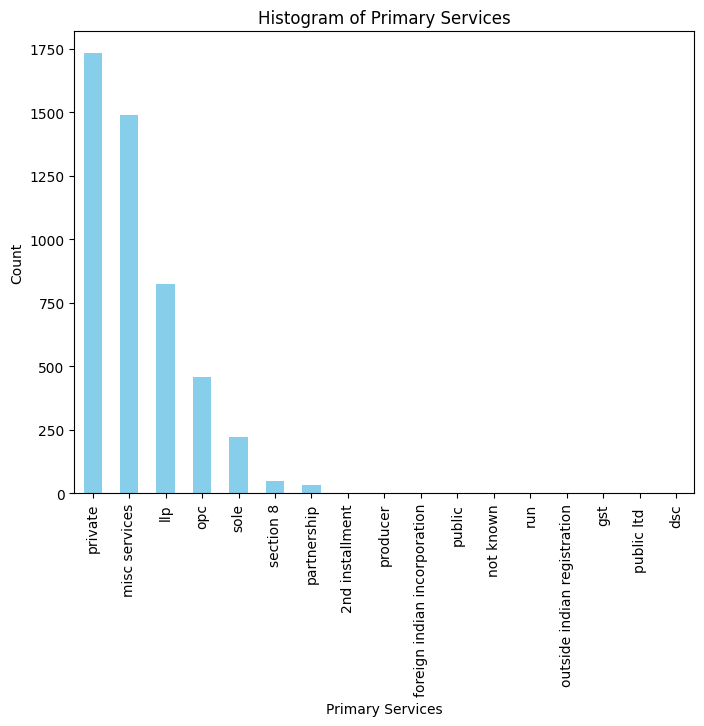

In [357]:
plt.figure(figsize=(8, 6))
df['Primary Services'].value_counts().plot(kind='bar', color='skyblue')

# Title and labels
plt.title('Histogram of Primary Services')
plt.xlabel('Primary Services')
plt.ylabel('Count')

# Display the histogram
plt.show()

#### Exact Misc Services( Write Correct Misc Services)

In [358]:
df.rename(columns={'Exact Misc Services( Write Correct Misc Services)': 'other services'}, inplace=True)

In [359]:
df['other services'].isnull().sum()

94

In [360]:
df['other services'].head(5)

,other services
0,"GST, MSME"
1,"Start-Up India, Trademark"
2,MSME
3,Others
4,"GST, MSME"


In [361]:
df['other services'] = df['other services'].astype(str)

In [362]:
services_array = df['other services'].str.split(',').explode().str.strip().to_numpy()

print(services_array[:])

['GST' 'MSME' 'Start-Up India' ... 'MSME' 'GST' 'MSME']


In [363]:
unique_services = list(set(services_array))
unique_services

['',
 'two Start-Up India',
 'Others',
 'Compliance Token',
 'nan',
 'Company Address Change',
 'Second Installment',
 'Name Change',
 'RAJASTHAN VO',
 'LLP business activity change',
 'Virtual office',
 'GST filings',
 'LLP ROC CHANGE FROM TAMIL NADHU TO KARNATAKA',
 'IEC',
 'SECOND INSTALLMENT',
 'Change in LLP agreement',
 'RUN APPROVAL',
 'ICEGATE',
 'gst registration',
 '1 DSC- Encrypted',
 'GEM',
 'FULL AMOUNT',
 'GST',
 'DSCS',
 '12A',
 'Not taken other services',
 'REmaining for Startup',
 'GST Registration',
 'ISO 14001:2015 and EPR E-waste',
 'company DSC',
 'NOT APPLICABLE.',
 'Attorney + 3 Hearing',
 'DIN ACTIVATION',
 'din activation',
 'Token Amount',
 'DSC CHARGES',
 'Company Name Change',
 'Na',
 'ISO',
 'Increase in Paid-Up capital',
 'no misc',
 'Not Required',
 'Share Transfer',
 'd',
 'basic FSSAI',
 'FSSAI',
 'Director removal',
 'individual dsc',
 '2 DSC',
 'non',
 '80iac',
 'Start-Up India',
 'GST FILINGS',
 'MOA change',
 'Not taken another services',
 'opc',
 '

* This is becommming too trouble some.   Will deal with it later.

#### Amount

In [364]:
df.rename(columns={'\nAmount': 'Amount'}, inplace=True)

In [365]:
df.head(1)

,Timestamp,Sales SPOC,Primary Services,other services,Amount,Remaining Amount,State,Month,date,Hr
0,2024-08-09 10:44:15.433000,shamli sharma,opc,"GST, MSME",5714,2448,Tamil Nadu,08,09,10


In [366]:
df['Amount'].isnull().sum()

1

In [367]:
df[df['Amount'].isnull()]

,Timestamp,Sales SPOC,Primary Services,other services,Amount,Remaining Amount,State,Month,date,Hr
1178,2024-08-30 19:49:11.280000,mansi,llp,"GST, MSME",NaN,0,Maharashtra,08,30,19


In [368]:
df[(df['Sales SPOC'] == 'mansi') & (df['other services']=='GST, MSME') & (df['State'] == 'Maharashtra')]

,Timestamp,Sales SPOC,Primary Services,other services,Amount,Remaining Amount,State,Month,date,Hr
1055,2024-08-29 15:36:21.334000,mansi,opc,"GST, MSME",6236,-,Maharashtra,08,29,15
1178,2024-08-30 19:49:11.280000,mansi,llp,"GST, MSME",NaN,0,Maharashtra,08,30,19
1179,2024-08-30 19:54:30.663000,mansi,private,"GST, MSME",4999,7500,Maharashtra,08,30,19
1183,2024-08-30 20:02:05.304000,mansi,private,"GST, MSME",1999,0,Maharashtra,08,30,20
1393,2024-09-03 18:49:09.406000,mansi,llp,"GST, MSME",7865,0,Maharashtra,09,03,18
1542,2024-09-05 19:16:17.953000,mansi,private,"GST, MSME",8742,0,Maharashtra,09,05,19
1899,2024-09-11 19:41:30.893000,mansi,llp,"GST, MSME",9865,0,Maharashtra,09,11,19
2057,2024-09-14 17:27:02.382000,mansi,partnership,"GST, MSME",5000,3751,Maharashtra,09,14,17
2411,2024-09-21 11:32:41.663000,mansi,opc,"GST, MSME",4365,0,Maharashtra,09,21,11
2727,2024-09-26 13:23:16.135000,mansi,llp,"GST, MSME",7000,0,Maharashtra,09,26,13


* Bascically tshis Nan with 0 amount remaining are useless transactions ... need to drop such rows.

In [369]:
df['Amount'] = df['Amount'].fillna(0)

In [370]:
df['Amount'].isnull().sum()

0

In [371]:
df.rename(columns={'Amount': 'Amount_Given'}, inplace=True)

In [372]:
df['Amount_Given'].info()

<class 'pandas.core.series.Series'>
Index: 4813 entries, 0 to 4813
Series name: Amount_Given
Non-Null Count  Dtype 
--------------  ----- 
4813 non-null   object
dtypes: object(1)
memory usage: 75.2+ KB


In [373]:
' this gives error as some non-numeric characters are also present.'

' this gives error as some non-numeric characters are also present.'

In [374]:
non_digit_rows = df[~df['Amount_Given'].astype(str).str.match(r'^\d+$')]

non_digit_rows

,Timestamp,Sales SPOC,Primary Services,other services,Amount_Given,Remaining Amount,State,Month,date,Hr
6,2024-08-09 12:03:45.997000,vishap,private,"GST, MSME",17499/-,0,Karnataka,08,09,12
56,2024-08-10 12:15:21.839000,vishap,sole,"GST, Sole Proprietorship",2000/-,0,NaN,08,10,12
99,2024-08-11 15:09:45.104000,vishap,llp,Others,4000/-,0,NaN,08,11,15
181,2024-08-13 12:59:51.038000,yash suri,misc services,80iac,"₹14,000",0,NaN,08,13,12
202,2024-08-13 16:17:12.392000,vishap,misc services,Director Addition,5000/-,0,NaN,08,13,16
...,...,...,...,...,...,...,...,...,...,...
4652,2024-10-27 14:42:51.284000,rishabh,opc,"GST, MSME",18450/-,4297,Karnataka,10,27,14
4712,2024-10-28 15:31:58.833000,gurpreet,misc services,Start-Up India,5000.99,0,Goa,10,28,15
4732,2024-10-28 17:39:49.138000,gurpreet,misc services,Start-Up India,5000.99,NaN,Goa,10,28,17
4734,2024-10-28 17:43:50.636000,ahana,misc services,"80iac, Start-Up India",5000/-,0,Karnataka,10,28,17


In [375]:
df['Amount_Given'] = df['Amount_Given'].astype(str)

In [376]:
# Remove '/-' from the end

df['Amount_Given'] = df['Amount_Given'].apply(lambda x: x[:-2] if isinstance(x, str) and x.endswith('/-') else x)

In [377]:
non_digit_rows = df[~df['Amount_Given'].astype(str).str.match(r'^\d+$')]
non_digit_rows.shape

(42, 10)

In [378]:
non_digit_rows

,Timestamp,Sales SPOC,Primary Services,other services,Amount_Given,Remaining Amount,State,Month,date,Hr
181,2024-08-13 12:59:51.038000,yash suri,misc services,80iac,"₹14,000",0,NaN,08,13,12
212,2024-08-13 17:01:15.222000,pranay arora,misc services,Only Misc Services,230 POUNDS,NaN,NaN,08,13,17
355,2024-08-16 15:18:54.630000,mananreet kaur,private,"GST, Virtual office","1,00,000",4462,Karnataka,08,16,15
451,2024-08-19 16:53:44.672000,vishap,misc services,FSSAI,2500/,0,Punjab,08,19,16
485,2024-08-20 17:27:49.510000,mahima,misc services,Trademark,6550+14450(Credit note),30000,Haryana,08,20,17
563,2024-08-21 18:16:04.242000,harsh somani,misc services,Virtual office,9999.9,NaN,Karnataka,08,21,18
595,2024-08-22 13:01:27.779000,shubham pant,private,"GST, MSME, Start-Up India, Trademark",7750 Second installment,0,Gujarat,08,22,13
625,2024-08-22 16:54:12.866000,shreyash,llp,none,5505.5,0,Rajasthan,08,22,16
683,2024-08-23 13:55:11.659000,pranay arora,misc services,OUTSIDE INDIAN REGISTRATION,330 POUNDS,0,NaN,08,23,13
701,2024-08-23 16:16:14.477000,kavya vishnoi,private,"GST, MSME",8000+1000,0,Maharashtra,08,23,16


In [379]:
df['Amount_Given'] = df['Amount_Given'].str.replace(',', '')
# for strings like 1,00,300

In [380]:
non_digit_rows = df[~df['Amount_Given'].astype(str).str.match(r'^\d+$')]

non_digit_rows.shape

(35, 10)

In [381]:
non_digit_rows

,Timestamp,Sales SPOC,Primary Services,other services,Amount_Given,Remaining Amount,State,Month,date,Hr
181,2024-08-13 12:59:51.038000,yash suri,misc services,80iac,₹14000,0,NaN,08,13,12
212,2024-08-13 17:01:15.222000,pranay arora,misc services,Only Misc Services,230 POUNDS,NaN,NaN,08,13,17
451,2024-08-19 16:53:44.672000,vishap,misc services,FSSAI,2500/,0,Punjab,08,19,16
485,2024-08-20 17:27:49.510000,mahima,misc services,Trademark,6550+14450(Credit note),30000,Haryana,08,20,17
563,2024-08-21 18:16:04.242000,harsh somani,misc services,Virtual office,9999.9,NaN,Karnataka,08,21,18
595,2024-08-22 13:01:27.779000,shubham pant,private,"GST, MSME, Start-Up India, Trademark",7750 Second installment,0,Gujarat,08,22,13
625,2024-08-22 16:54:12.866000,shreyash,llp,none,5505.5,0,Rajasthan,08,22,16
683,2024-08-23 13:55:11.659000,pranay arora,misc services,OUTSIDE INDIAN REGISTRATION,330 POUNDS,0,NaN,08,23,13
701,2024-08-23 16:16:14.477000,kavya vishnoi,private,"GST, MSME",8000+1000,0,Maharashtra,08,23,16
962,2024-08-28 13:03:52.182000,navya lakra,llp,"GST, MSME, Virtual office",7999+18000,0,Karnataka,08,28,13


In [382]:
df['Amount_Given'] = df['Amount_Given'].str.replace('Rs.', '', case=False)
df['Amount_Given'] = df['Amount_Given'].str.replace(' (balance payment)', '', case=False)
df['Amount_Given'] = df['Amount_Given'].str.replace('Credit Note (0)', '0', case=False)
df['Amount_Given'] = df['Amount_Given'].str.replace('(Credit Note)', '', case=False)
df['Amount_Given'] = df['Amount_Given'].str.replace('-', '', case=False)
df['Amount_Given'] = df['Amount_Given'].str.replace(' SECOND INSTALLMENT WITH DSC', '', case=False)
df['Amount_Given'] = df['Amount_Given'].str.replace('/', '', case=False)

In [383]:
non_digit_rows = df[~df['Amount_Given'].astype(str).str.match(r'^\d+$')]

non_digit_rows.shape

(29, 10)

In [384]:
non_digit_rows

,Timestamp,Sales SPOC,Primary Services,other services,Amount_Given,Remaining Amount,State,Month,date,Hr
181,2024-08-13 12:59:51.038000,yash suri,misc services,80iac,₹14000,0,NaN,08,13,12
212,2024-08-13 17:01:15.222000,pranay arora,misc services,Only Misc Services,230 POUNDS,NaN,NaN,08,13,17
485,2024-08-20 17:27:49.510000,mahima,misc services,Trademark,6550+14450,30000,Haryana,08,20,17
563,2024-08-21 18:16:04.242000,harsh somani,misc services,Virtual office,9999.9,NaN,Karnataka,08,21,18
595,2024-08-22 13:01:27.779000,shubham pant,private,"GST, MSME, Start-Up India, Trademark",7750 Second installment,0,Gujarat,08,22,13
625,2024-08-22 16:54:12.866000,shreyash,llp,none,5505.5,0,Rajasthan,08,22,16
683,2024-08-23 13:55:11.659000,pranay arora,misc services,OUTSIDE INDIAN REGISTRATION,330 POUNDS,0,NaN,08,23,13
701,2024-08-23 16:16:14.477000,kavya vishnoi,private,"GST, MSME",8000+1000,0,Maharashtra,08,23,16
962,2024-08-28 13:03:52.182000,navya lakra,llp,"GST, MSME, Virtual office",7999+18000,0,Karnataka,08,28,13
1655,2024-09-07 13:25:40.892000,parakram mittal,llp,"GST, MSME",3932.5,0,NaN,09,07,13


In [385]:
df[df['other services'] == 'OUTSIDE INDIAN REGISTRATION']

,Timestamp,Sales SPOC,Primary Services,other services,Amount_Given,Remaining Amount,State,Month,date,Hr
683,2024-08-23 13:55:11.659000,pranay arora,misc services,OUTSIDE INDIAN REGISTRATION,330 POUNDS,0,NaN,08,23,13
3052,2024-10-01 14:22:21.064000,pranay arora,misc services,OUTSIDE INDIAN REGISTRATION,19550,19550,NaN,10,01,14


In [386]:
conversion_rate = 107

df['Amount_Given'] = df['Amount_Given'].apply(
    lambda x: str(int(330 * conversion_rate)) if x == '330 POUNDS' else x
)
df['Amount_Given'] = df['Amount_Given'].apply(
    lambda x: str(int(230 * conversion_rate)) if x == '230 POUNDS' else x
)


In [387]:
non_digit_rows = df[~df['Amount_Given'].astype(str).str.match(r'^\d+$')]

non_digit_rows

,Timestamp,Sales SPOC,Primary Services,other services,Amount_Given,Remaining Amount,State,Month,date,Hr
181,2024-08-13 12:59:51.038000,yash suri,misc services,80iac,₹14000,0,NaN,08,13,12
485,2024-08-20 17:27:49.510000,mahima,misc services,Trademark,6550+14450,30000,Haryana,08,20,17
563,2024-08-21 18:16:04.242000,harsh somani,misc services,Virtual office,9999.9,NaN,Karnataka,08,21,18
595,2024-08-22 13:01:27.779000,shubham pant,private,"GST, MSME, Start-Up India, Trademark",7750 Second installment,0,Gujarat,08,22,13
625,2024-08-22 16:54:12.866000,shreyash,llp,none,5505.5,0,Rajasthan,08,22,16
701,2024-08-23 16:16:14.477000,kavya vishnoi,private,"GST, MSME",8000+1000,0,Maharashtra,08,23,16
962,2024-08-28 13:03:52.182000,navya lakra,llp,"GST, MSME, Virtual office",7999+18000,0,Karnataka,08,28,13
1655,2024-09-07 13:25:40.892000,parakram mittal,llp,"GST, MSME",3932.5,0,NaN,09,07,13
2487,2024-09-23 12:11:45.851000,gunaj khurana,private,GST,5140.3,NaN,Kerala,09,23,12
2617,2024-09-24 19:31:59.546000,mansi,llp,"GST, MSME, Virtual office",8932.5,0,Karnataka,09,24,19


In [388]:
conversion_rate = 85
df['Amount_Given'] = df['Amount_Given'].apply(
    lambda x: str(int(450 * conversion_rate)) if x == '$450' else x )

df['Amount_Given'] = df['Amount_Given'].apply(
    lambda x: str(7999+18000) if x == '7999+18000' else x )

df['Amount_Given'] = df['Amount_Given'].apply(
    lambda x: str(8000+1000) if x == '8000+1000' else x )

df['Amount_Given'] = df['Amount_Given'].apply(
    lambda x: str(6550+14450) if x == '6550+14450' else x )

df['Amount_Given'] = df['Amount_Given'].apply(
    lambda x: str(7750) if x == '7750 Second installment' else x )

df['Amount_Given'] = df['Amount_Given'].apply(
    lambda x: str(14000) if x == '₹14000' else x )


In [389]:
non_digit_rows = df[~df['Amount_Given'].astype(str).str.match(r'^\d+$')]

non_digit_rows

,Timestamp,Sales SPOC,Primary Services,other services,Amount_Given,Remaining Amount,State,Month,date,Hr
563,2024-08-21 18:16:04.242000,harsh somani,misc services,Virtual office,9999.9,NaN,Karnataka,08,21,18
625,2024-08-22 16:54:12.866000,shreyash,llp,none,5505.5,0,Rajasthan,08,22,16
1655,2024-09-07 13:25:40.892000,parakram mittal,llp,"GST, MSME",3932.5,0,NaN,09,07,13
2487,2024-09-23 12:11:45.851000,gunaj khurana,private,GST,5140.3,NaN,Kerala,09,23,12
2617,2024-09-24 19:31:59.546000,mansi,llp,"GST, MSME, Virtual office",8932.5,0,Karnataka,09,24,19
2708,2024-09-26 11:25:51.005000,gursimar,llp,"GST, MSME",3932.5,0,Telangana,09,26,11
2833,2024-09-27 17:30:38.202000,vishap,llp,"GST, MSME",3932.5,0,Madhya Pradesh,09,27,17
3036,2024-09-30 20:17:39.048000,mansi,llp,"GST, MSME",8923.5,9999,Karnataka,09,30,20
3053,2024-10-01 15:16:37.214000,akshay,opc,GST,10955.85,0,Kerala,10,01,15
3191,2024-10-04 17:27:06.083000,drishay arora,llp,"GST, MSME",5555.5,NaN,Haryana,10,04,17


In [390]:
# now removing ALL decimals
df['Amount_Given'] = df['Amount_Given'].apply(lambda x: x.split('.')[0] if '.' in x else x)

In [391]:
non_digit_rows = df[~df['Amount_Given'].astype(str).str.match(r'^\d+$')]

non_digit_rows

,Timestamp,Sales SPOC,Primary Services,other services,Amount_Given,Remaining Amount,State,Month,date,Hr


In [392]:
df['Amount_Given'] = df['Amount_Given'].astype(int)

In [393]:
df[df['Primary Services']=='foreign indian incorporation']

,Timestamp,Sales SPOC,Primary Services,other services,Amount_Given,Remaining Amount,State,Month,date,Hr
2410,2024-09-21 11:30:40.170000,navya lakra,foreign indian incorporation,nan,50112,0,NaN,09,21,11
3948,2024-10-16 17:16:02.324000,shrey sharma,foreign indian incorporation,2nd Instalment,38250,NaN,Uttar Pradesh,10,16,17


#### Remaining Amount

In [394]:
df['Remaining Amount'].isnull().sum()

750

In [395]:
df['Remaining Amount'] = df['Remaining Amount'].fillna('0')

In [396]:
df['Remaining Amount'] = df['Remaining Amount'].astype(str)

In [397]:
non_digit_rows = df[~df['Remaining Amount'].astype(str).str.match(r'^\d+$')]

non_digit_rows

,Timestamp,Sales SPOC,Primary Services,other services,Amount_Given,Remaining Amount,State,Month,date,Hr
98,2024-08-11 14:20:48.838000,gurpreet,misc services,80iac,14000,3865/-,NaN,08,11,14
250,2024-08-14 12:32:11.688000,priyanka,misc services,Trademark,2000,already paid 2500 earlier,Maharashtra,08,14,12
297,2024-08-14 19:48:00.999000,shrey sharma,partnership,"GST, MSME, Partnership",4236,3865/-,Tamil Nadu,08,14,19
425,2024-08-18 13:40:44.523000,shrey sharma,private,"GST, MSME",17000,5952/-,Karnataka,08,18,13
624,2024-08-22 16:52:51.301000,mahima,misc services,Start-Up India,5000,2359.5,Jharkhand,08,22,16
...,...,...,...,...,...,...,...,...,...,...
4692,2024-10-28 12:55:33.456000,siddharth jain,sole,"GST, MSME",2000,-,Tamil Nadu,10,28,12
4714,2024-10-28 15:38:24.311000,pulkit,misc services,Trademark,6000,-,NaN,10,28,15
4717,2024-10-28 15:50:20.459000,tarun,sole,"GST, MSME, Sole Proprietorship",2999,20000/-,NaN,10,28,15
4757,2024-10-28 20:28:08.210000,aarzoo,misc services,"ISO, IAF ISO 9001",12000,-,Gujarat,10,28,20


In [398]:
df['Remaining Amount'] = df['Remaining Amount'].str.replace('/-', '', case=False)
df['Remaining Amount'] = df['Remaining Amount'].str.replace('-', '', case=False)

In [399]:
df['Remaining Amount'].isnull().sum()

0

In [400]:
df['Remaining Amount'] = df['Remaining Amount'].str.replace(' ', '', case=False)
# df['Remaining Amount'] = df['Remaining Amount'].str.replace('', '0', case=False)  - mistake

In [401]:
non_digit_rows = df[~df['Remaining Amount'].astype(str).str.match(r'^\d+$')]

non_digit_rows.shape

(218, 10)

In [402]:
df['Remaining Amount'] = df['Remaining Amount'].str.strip().replace('', '0')

In [403]:
df['Remaining Amount'] = df['Remaining Amount'].str.strip().replace('nil', '0')
df['Remaining Amount'] = df['Remaining Amount'].str.strip().replace('X', '0')
df['Remaining Amount'] = df['Remaining Amount'].str.strip().replace('o', '0')
df['Remaining Amount'] = df['Remaining Amount'].str.strip().replace('alreadypaid2500earlier', '2500')
df['Remaining Amount'] = df['Remaining Amount'].str.strip().replace('https://rzp.io/i/jCyPSan', '1500')
df['Remaining Amount'] = df['Remaining Amount'].str.strip().replace('ENUKASHIVAREDDYPVT+GST+MSME(8374399879)', '0')
df['Remaining Amount'] = df['Remaining Amount'].str.strip().replace('https://rzp.io/rzp/K3YtQJg', '7000')
df['Remaining Amount'] = df['Remaining Amount'].str.strip().replace('https://rzp.io/rzp/w78MIg8M', '2450')
df['Remaining Amount'] = df['Remaining Amount'].str.strip().replace('https://rzp.io/rzp/w78MIg8M', '2450')

In [404]:
non_digit_rows = df[~df['Remaining Amount'].astype(str).str.match(r'^\d+$')]

non_digit_rows

,Timestamp,Sales SPOC,Primary Services,other services,Amount_Given,Remaining Amount,State,Month,date,Hr
624,2024-08-22 16:52:51.301000,mahima,misc services,Start-Up India,5000,2359.5,Jharkhand,08,22,16
1652,2024-09-07 13:21:47.915000,keshav grover,opc,"GST, MSME",9440,3932.5,Uttar Pradesh,09,07,13
2456,2024-09-21 19:11:12.977000,mansi,private,"GST, MSME",9499,"6,743",Haryana,09,21,19
2614,2024-09-24 19:23:23.004000,shrey sharma,private,Others,6349,8932.5,Maharashtra,09,24,19
2705,2024-09-26 10:12:47.339000,ashwini kumar sharma,private,"GST, MSME",10749,3932.5,Goa,09,26,10
3174,2024-10-04 15:27:53.988000,saloni,llp,Others,1499,2309.5,Manipur,10,04,15
3254,2024-10-05 16:55:26.881000,harsh somani,misc services,"LUT, IEC",5999,10000(Stampduty),NaN,10,05,16
3356,2024-10-07 17:54:26.019000,pulkit,misc services,Start-Up India,5999,3807.5,NaN,10,07,17
3960,2024-10-16 19:06:17.773000,mahima,misc services,Start-Up India,4000,Rs.4365,Gujarat,10,16,19
4433,2024-10-23 21:53:58.870000,auto,llp,GST,0,3782.5,Karnataka,10,23,21


In [405]:
# df['Remaining Amount'] = df['Remaining Amount'].str.replace(r'^Rs.\s', '', regex=True)
df['Remaining Amount'] = df['Remaining Amount'].str.replace(r'^Rs.\s*', '', regex=True)


In [406]:
non_digit_rows = df[~df['Remaining Amount'].astype(str).str.match(r'^\d+$')]

non_digit_rows

,Timestamp,Sales SPOC,Primary Services,other services,Amount_Given,Remaining Amount,State,Month,date,Hr
624,2024-08-22 16:52:51.301000,mahima,misc services,Start-Up India,5000,2359.5,Jharkhand,08,22,16
1652,2024-09-07 13:21:47.915000,keshav grover,opc,"GST, MSME",9440,3932.5,Uttar Pradesh,09,07,13
2456,2024-09-21 19:11:12.977000,mansi,private,"GST, MSME",9499,"6,743",Haryana,09,21,19
2614,2024-09-24 19:23:23.004000,shrey sharma,private,Others,6349,8932.5,Maharashtra,09,24,19
2705,2024-09-26 10:12:47.339000,ashwini kumar sharma,private,"GST, MSME",10749,3932.5,Goa,09,26,10
3174,2024-10-04 15:27:53.988000,saloni,llp,Others,1499,2309.5,Manipur,10,04,15
3254,2024-10-05 16:55:26.881000,harsh somani,misc services,"LUT, IEC",5999,10000(Stampduty),NaN,10,05,16
3356,2024-10-07 17:54:26.019000,pulkit,misc services,Start-Up India,5999,3807.5,NaN,10,07,17
4433,2024-10-23 21:53:58.870000,auto,llp,GST,0,3782.5,Karnataka,10,23,21


In [407]:
df['Remaining Amount'] = df['Remaining Amount'].str.strip().replace('6,743', '6743')
df['Remaining Amount'] = df['Remaining Amount'].str.strip().replace('10000(Stampduty)', '10000')

In [408]:
non_digit_rows = df[~df['Remaining Amount'].astype(str).str.match(r'^\d+$')]

non_digit_rows

,Timestamp,Sales SPOC,Primary Services,other services,Amount_Given,Remaining Amount,State,Month,date,Hr
624,2024-08-22 16:52:51.301000,mahima,misc services,Start-Up India,5000,2359.5,Jharkhand,08,22,16
1652,2024-09-07 13:21:47.915000,keshav grover,opc,"GST, MSME",9440,3932.5,Uttar Pradesh,09,07,13
2614,2024-09-24 19:23:23.004000,shrey sharma,private,Others,6349,8932.5,Maharashtra,09,24,19
2705,2024-09-26 10:12:47.339000,ashwini kumar sharma,private,"GST, MSME",10749,3932.5,Goa,09,26,10
3174,2024-10-04 15:27:53.988000,saloni,llp,Others,1499,2309.5,Manipur,10,04,15
3356,2024-10-07 17:54:26.019000,pulkit,misc services,Start-Up India,5999,3807.5,NaN,10,07,17
4433,2024-10-23 21:53:58.870000,auto,llp,GST,0,3782.5,Karnataka,10,23,21


In [409]:
# now removing ALL decimals
df['Remaining Amount'] = df['Remaining Amount'].apply(lambda x: x.split('.')[0] if '.' in x else x)

In [410]:
non_digit_rows = df[~df['Remaining Amount'].astype(str).str.match(r'^\d+$')]

non_digit_rows

,Timestamp,Sales SPOC,Primary Services,other services,Amount_Given,Remaining Amount,State,Month,date,Hr


◘ Need to have a look at , those combinations where amount given and amount received both are 0,0  [ LATER ]

◘ Means that is useless data to look at.

#### State

In [411]:
df['State'].isnull().sum()

602

In [412]:
df['State'].shape

(4813,)

In [413]:
602 / 4813

0.1250779139829628

◘ 12 % data is not known ,  making a solid descision will be a challenge.

In [414]:
df['State'] = df['State'].fillna('not known')

In [415]:
df['State'] = df['State'].astype(str)

In [416]:
df['State'].value_counts()

,count
State,
not known,602
Karnataka,536
Maharashtra,518
Delhi,456
Uttar Pradesh,391
Haryana,363
Telangana,200
Goa,199
Tamil Nadu,195


In [417]:
df['State'] = df['State'].str.lower()

In [418]:
sorted(df['State'].unique())

['andhra pradesh',
 'andman & nicobar',
 'arunachal pradesh',
 'assam',
 'bihar',
 'chhattisgarh',
 'delhi',
 'goa',
 'gujarat',
 'haryana',
 'himachal pradesh',
 'hp',
 'jammu & kashmir',
 'jammu&kashmir',
 'jharkhand',
 'karnataka',
 'karnataka ',
 'kerala',
 'madhya pradesh',
 'maharashtra',
 'maharashtra ',
 'maharastra',
 'manipur',
 'manipur ',
 'meghalaya',
 'mizoram',
 'mp',
 'nagaland',
 'not known',
 'odisha',
 'punjab',
 'rajasthan',
 'tamil nadu',
 'telangana',
 'telangana ',
 'tripura',
 'up',
 'uttar pradesh',
 'uttar pradesh ',
 'uttarakhand',
 'west bengal']

In [419]:
df['State'] = df['State'].str.replace('uttar pradesh ', 'up', case=False)
df['State'] = df['State'].str.replace('uttar pradesh', 'up', case=False)

df['State'] = df['State'].str.replace('uttarakhand', 'uk', case=False)

df['State'] = df['State'].str.replace('west bengal', 'wb', case=False)

df['State'] = df['State'].str.replace('telangana ', 'telangana', case=False)

df['State'] = df['State'].str.replace('manipur ', 'manipur', case=False)

df['State'] = df['State'].str.replace('maharashtra ', 'maharashtra', case=False)
df['State'] = df['State'].str.replace('maharastra', 'maharashtra', case=False)

df['State'] = df['State'].str.replace('madhya pradesh', 'mp', case=False)

df['State'] = df['State'].str.replace('karnataka ', 'karnataka', case=False)

df['State'] = df['State'].str.replace('jammu&kashmir', 'J&K', case=False)
df['State'] = df['State'].str.replace('jammu & kashmir', 'J&K', case=False)

df['State'] = df['State'].str.replace('himachal pradesh', 'hp', case=False)

In [420]:
sorted(df['State'].unique())

['J&K',
 'andhra pradesh',
 'andman & nicobar',
 'arunachal pradesh',
 'assam',
 'bihar',
 'chhattisgarh',
 'delhi',
 'goa',
 'gujarat',
 'haryana',
 'hp',
 'jharkhand',
 'karnataka',
 'kerala',
 'maharashtra',
 'manipur',
 'meghalaya',
 'mizoram',
 'mp',
 'nagaland',
 'not known',
 'odisha',
 'punjab',
 'rajasthan',
 'tamil nadu',
 'telangana',
 'tripura',
 'uk',
 'up',
 'wb']

#### Extra cleaning

In [421]:
df.head(1)

,Timestamp,Sales SPOC,Primary Services,other services,Amount_Given,Remaining Amount,State,Month,date,Hr
0,2024-08-09 10:44:15.433000,shamli sharma,opc,"GST, MSME",5714,2448,tamil nadu,08,09,10


* 'Timestamp' is of no use

In [422]:
df = df.drop(columns=['Timestamp'])

In [423]:
df.head(1)

,Sales SPOC,Primary Services,other services,Amount_Given,Remaining Amount,State,Month,date,Hr
0,shamli sharma,opc,"GST, MSME",5714,2448,tamil nadu,08,09,10


In [424]:
print(df.dtypes)

Sales SPOC          object
Primary Services    object
other services      object
Amount_Given         int64
Remaining Amount    object
State               object
Month               object
date                object
Hr                  object
dtype: object


In [425]:
df['Remaining Amount'] = df['Remaining Amount'].astype(int)

## Analysis

◘ What is total revenue in each month ?

In [426]:
df.head(1)

,Sales SPOC,Primary Services,other services,Amount_Given,Remaining Amount,State,Month,date,Hr
0,shamli sharma,opc,"GST, MSME",5714,2448,tamil nadu,08,09,10


In [427]:
df['Month'].unique()

array(['08', '09', '10', ''], dtype=object)

In [428]:
df[df['Month'] == '']

,Sales SPOC,Primary Services,other services,Amount_Given,Remaining Amount,State,Month,date,Hr
4813,gunaj khurana,llp,"GST, MSME",1499,0,maharashtra,,,


In [429]:
df[df['Sales SPOC']=='gunaj khurana']['Month'].value_counts()

,count
Month,
10,58
09,27
08,1
,1


◘ this unkonwn value is definitely not in 'AUG'  //  we can drop it

In [430]:
df['Month'] = df['Month'].astype(str)

In [431]:
df['Month'] = df['Month'].str.replace('08', 'AUG', case=False)
df['Month'] = df['Month'].str.replace('09', 'SEP', case=False)
df['Month'] = df['Month'].str.replace('10', 'OCT', case=False)

In [432]:
df.head(1)

,Sales SPOC,Primary Services,other services,Amount_Given,Remaining Amount,State,Month,date,Hr
0,shamli sharma,opc,"GST, MSME",5714,2448,tamil nadu,AUG,09,10


In [433]:
df.loc[df['Month'] == '', 'Month'] = '?'

In [434]:
df[df['Month'] == '?']

,Sales SPOC,Primary Services,other services,Amount_Given,Remaining Amount,State,Month,date,Hr
4813,gunaj khurana,llp,"GST, MSME",1499,0,maharashtra,?,,


In [435]:
df['Total'] = df['Amount_Given'] + df['Remaining Amount']

In [436]:
df['diff'] = df['Amount_Given'] - df['Remaining Amount']

In [437]:
df[df['diff'] < 0].shape

(432, 11)

* Yes there are many whare diff is -ve , this means , these columns are really , amount_paid , amount_left  and not Total_amt_to_be_paid and remaining_balance

In [438]:
df.drop(columns=['diff'], inplace=True)

In [439]:
monthly_sales = df.groupby('Month')['Total'].sum().reset_index()

In [440]:
monthly_sales

,Month,Total
0,?,1499
1,AUG,11526227
2,OCT,16273032
3,SEP,14269006


In [441]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

<ipython-input-442-248f5bb3c48c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_sales['Month'] = pd.Categorical(filtered_sales['Month'], categories=month_order, ordered=True)


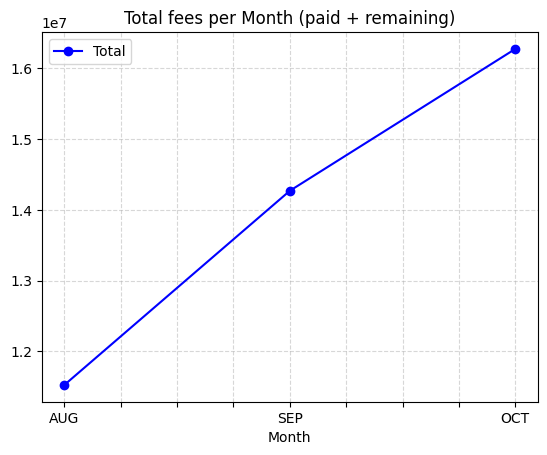

In [442]:
month_order = ['AUG', 'SEP', 'OCT']
filtered_sales = monthly_sales[monthly_sales['Month'].isin(month_order)]

filtered_sales['Month'] = pd.Categorical(filtered_sales['Month'], categories=month_order, ordered=True)
filtered_sales = filtered_sales.sort_values('Month')

filtered_sales.plot(kind='line', x='Month', y='Total', marker='o', title="Total fees per Month (paid + remaining)", color='blue')

plt.gca().yaxis
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

◘ Commenting on % of total fees , paid upfront is of no use , as we don't have info fo when will they pay us back

In [443]:
monthly_remain = df.groupby('Month')['Remaining Amount'].sum().reset_index()

In [444]:
monthly_remain

,Month,Remaining Amount
0,?,0
1,AUG,1777872
2,OCT,2847892
3,SEP,1873699


In [445]:
monthly_sales

,Month,Total
0,?,1499
1,AUG,11526227
2,OCT,16273032
3,SEP,14269006


In [446]:
monthly_remain['% remain'] = monthly_remain['Remaining Amount'] / monthly_sales['Total']

In [447]:
monthly_remain

,Month,Remaining Amount,% remain
0,?,0,0.000000
1,AUG,1777872,0.154246
2,OCT,2847892,0.175007
3,SEP,1873699,0.131313


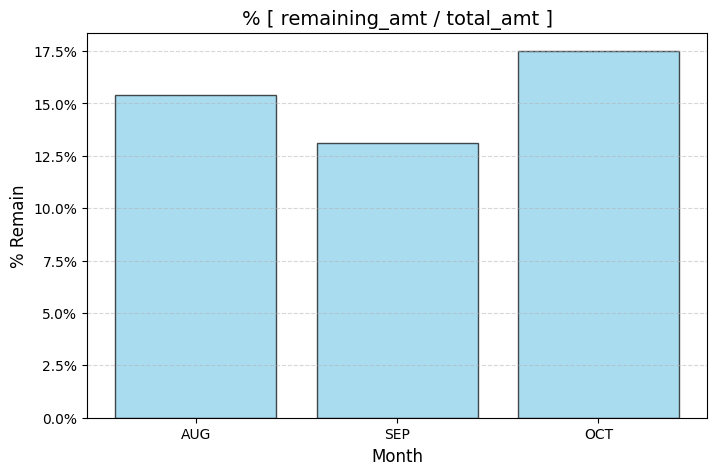

In [450]:
data = {
    'Month': ['AUG', 'SEP', 'OCT'],
    'Remaining Amount': [1777872, 1873699, 2847892],
    '% remain': [0.154246, 0.131313, 0.175007]
}

import pandas as pd
monthly_remain = pd.DataFrame(data)

plt.figure(figsize=(8, 5))
plt.bar(monthly_remain['Month'], monthly_remain['% remain'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title("% [ remaining_amt / total_amt ]", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("% Remain", fontsize=12)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x * 100:.1f}%'))

plt.grid(axis='y', linestyle='--', alpha=0.5)


◘ no of transactoins in a month ( frequency )

In [451]:
df.head(1)

,Sales SPOC,Primary Services,other services,Amount_Given,Remaining Amount,State,Month,date,Hr,Total
0,shamli sharma,opc,"GST, MSME",5714,2448,tamil nadu,AUG,09,10,8162


In [452]:
df_non_zero_total = df[df['Total'] != 0].copy()

In [453]:
monthly_count = df.groupby('Month')['Remaining Amount'].count().reset_index()

In [454]:
monthly_count['Total_amt'] = monthly_sales['Total']

In [455]:
monthly_count['avg ticket size'] = monthly_count['Total_amt'] / monthly_count['Remaining Amount']

In [456]:
monthly_count

,Month,Remaining Amount,Total_amt,avg ticket size
0,?,1,1499,1499.000000
1,AUG,1274,11526227,9047.273940
2,OCT,1774,16273032,9173.073281
3,SEP,1764,14269006,8089.005669


◘ More or less it remains same.

In [457]:
monthly_count = pd.DataFrame(data)

filtered_data = monthly_count[monthly_count['Month'].isin(['AUG', 'SEP', 'OCT'])]

plt.figure(figsize=(8, 5))
plt.bar(filtered_data['Month'], filtered_data['avg ticket size'], color='grey', edgecolor='black', alpha=0.8)

plt.title("Average Ticket Size (AUG, SEP, OCT)", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Avg Ticket Size", fontsize=12)

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.2f}'))

plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

KeyError: 'avg ticket size'

<Figure size 800x500 with 0 Axes>

In [ ]:
df.head(1)

◘ Which Primary Service is earning max in a month ?

In [458]:
monthly_service_total = df.groupby(['Month', 'Primary Services'])['Total'].sum().reset_index()

monthly_service_total

,Month,Primary Services,Total
0,?,llp,1499
1,AUG,2nd installment,5000
2,AUG,gst,2500
3,AUG,llp,1612267
4,AUG,misc services,3748383
5,AUG,opc,1195256
6,AUG,partnership,41600
7,AUG,private,4496335
8,AUG,producer,15000
9,AUG,public ltd,5000


In [459]:
monthly_service_total = df.groupby(['Month', 'Primary Services'])['Total'].sum().reset_index()

top_3_services_per_month = monthly_service_total.groupby('Month').apply(lambda x: x.nlargest(3, 'Total')).reset_index(drop=True)

top_3_services_per_month[['Month', 'Primary Services', 'Total']]

<ipython-input-459-7c62ea266432>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_3_services_per_month = monthly_service_total.groupby('Month').apply(lambda x: x.nlargest(3, 'Total')).reset_index(drop=True)


,Month,Primary Services,Total
0,?,llp,1499
1,AUG,private,4496335
2,AUG,misc services,3748383
3,AUG,llp,1612267
4,OCT,misc services,6043355
5,OCT,private,5494401
6,OCT,llp,2475912
7,SEP,private,5775412
8,SEP,misc services,4581895
9,SEP,llp,2028221


In [460]:
monthly_service_total = df.groupby(['Month', 'Primary Services'])['Total'].sum().reset_index()
top_2_services_per_month = monthly_service_total.groupby('Month').apply(lambda x: x.nlargest(2, 'Total')).reset_index(drop=True)

month_order = ['AUG', 'SEP', 'OCT']

top_2_services_per_month['Month'] = pd.Categorical(top_2_services_per_month['Month'], categories=month_order, ordered=True)
top_2_services_per_month_sorted = top_2_services_per_month.sort_values('Month')

top_2_services_per_month_sorted[['Month', 'Primary Services', 'Total']]

<ipython-input-460-a4488d66a484>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_2_services_per_month = monthly_service_total.groupby('Month').apply(lambda x: x.nlargest(2, 'Total')).reset_index(drop=True)


,Month,Primary Services,Total
1,AUG,private,4496335
2,AUG,misc services,3748383
5,SEP,private,5775412
6,SEP,misc services,4581895
3,OCT,misc services,6043355
4,OCT,private,5494401
0,NaN,llp,1499


◘ private & miscellanious remains top 2 , revenue generating source for each month

◘ What is % they contribute ?

In [461]:
A = top_2_services_per_month_sorted.groupby('Month')['Total'].sum().reset_index()
A

<ipython-input-461-0830b423781e>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  A = top_2_services_per_month_sorted.groupby('Month')['Total'].sum().reset_index()


,Month,Total
0,AUG,8244718
1,SEP,10357307
2,OCT,11537756


In [462]:
monthly_sales

,Month,Total
0,?,1499
1,AUG,11526227
2,OCT,16273032
3,SEP,14269006


In [463]:
8244718 / 11526227 , 10357307 / 14269006 , 11537756 / 16273032

(0.7153006790513496, 0.7258604418555854, 0.7090108346127507)

◘ Just these 2 contribute above 70% of total fees

◘ Now month - vs - State

In [464]:
# Group by
monthly_service_total = df.groupby(['Month', 'State'])['Total'].sum().reset_index()
top_3_services_per_month = monthly_service_total.groupby('Month').apply(lambda x: x.nlargest(3, 'Total')).reset_index(drop=True)
month_order = ['AUG', 'SEP', 'OCT']
top_3_services_per_month['Month'] = pd.Categorical(top_3_services_per_month['Month'], categories=month_order, ordered=True)

top_3_services_per_month_sorted = top_3_services_per_month.sort_values('Month')

top_3_services_per_month_sorted[['Month', 'State', 'Total']]

<ipython-input-464-53001c7da52d>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_3_services_per_month = monthly_service_total.groupby('Month').apply(lambda x: x.nlargest(3, 'Total')).reset_index(drop=True)


,Month,State,Total
1,AUG,karnataka,1854728
2,AUG,maharashtra,1234395
3,AUG,delhi,1052691
7,SEP,karnataka,2117537
8,SEP,not known,1519443
9,SEP,maharashtra,1362073
4,OCT,not known,2803790
5,OCT,karnataka,2592343
6,OCT,maharashtra,1597090
0,NaN,maharashtra,1499


◘ Karnataka & Maharastra remain in top 3 contributors.  BUT , cause of 12 % datra of state is missing , we can't be so sure

In [465]:
df.head(1)

,Sales SPOC,Primary Services,other services,Amount_Given,Remaining Amount,State,Month,date,Hr,Total
0,shamli sharma,opc,"GST, MSME",5714,2448,tamil nadu,AUG,09,10,8162


In [466]:
state_total = df.groupby('State')['Total'].sum().reset_index()

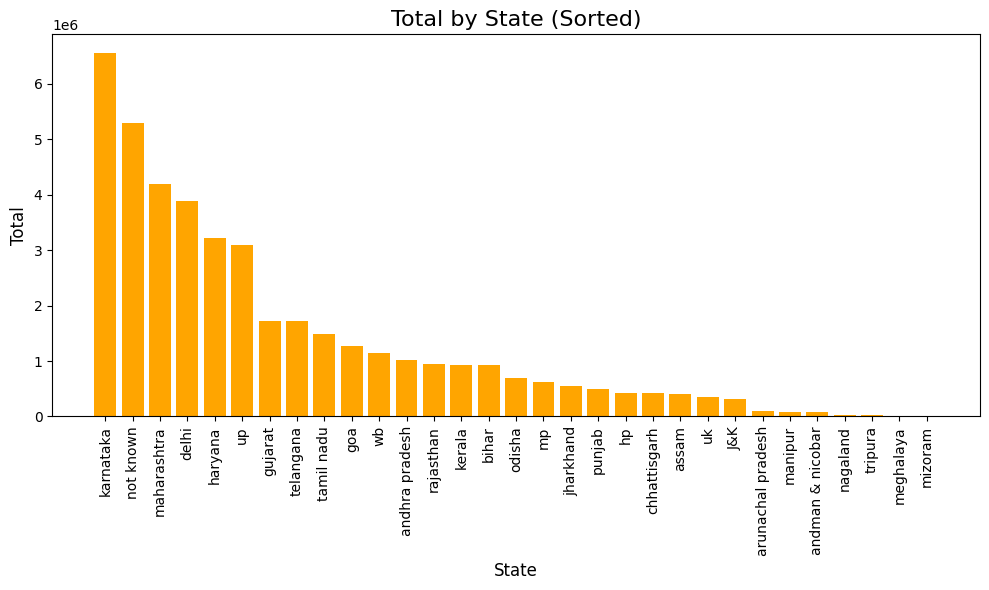

In [467]:

state_total_sorted = state_total.sort_values(by='Total', ascending=False)

plt.figure(figsize=(10,6))
plt.bar(state_total_sorted['State'], state_total_sorted['Total'], color='orange')

plt.title('Total by State (Sorted)', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Total', fontsize=12)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


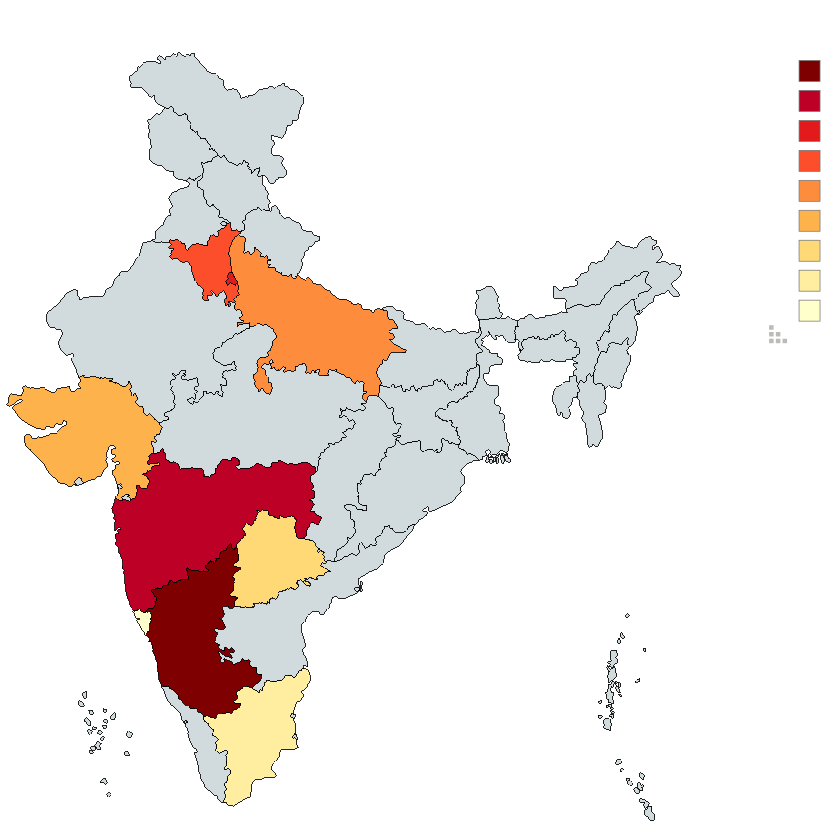

• Definitely for further accuracy , we can guess that , these unknown could be.

• one prob is , it could me an option which was not available while filling up, the DATA.

In [468]:
df['State'].unique()

array(['tamil nadu', 'up', 'not known', 'rajasthan', 'maharashtra',
       'karnataka', 'uk', 'telangana', 'kerala', 'bihar', 'jharkhand',
       'hp', 'punjab', 'mp', 'wb', 'delhi', 'haryana', 'odisha',
       'gujarat', 'andhra pradesh', 'J&K', 'manipur', 'chhattisgarh',
       'assam', 'nagaland', 'goa', 'meghalaya', 'andman & nicobar',
       'arunachal pradesh', 'mizoram', 'tripura'], dtype=object)

◘ Sikkim is missing
◘ Delhi being small in area is 4th largest

◘ I want top 'Primary services' for each state.

In [469]:

state_total = df.groupby('State')['Total'].sum().reset_index()

top_8_states = state_total.nlargest(8, 'Total')['State']

df_1 = df[df['State'].isin(top_8_states)]

df_1['State'].unique()

array(['up', 'not known', 'maharashtra', 'karnataka', 'telangana',
       'delhi', 'haryana', 'gujarat'], dtype=object)

In [470]:

state_service_total = df_1.groupby(['State', 'Primary Services'])['Total'].sum().reset_index()
top_service_per_state = state_service_total.groupby('State').apply(lambda x: x.nlargest(3, 'Total')).reset_index(drop=True)
top_service_per_state[['State', 'Primary Services', 'Total']]

<ipython-input-470-d405b0740ed7>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_service_per_state = state_service_total.groupby('State').apply(lambda x: x.nlargest(3, 'Total')).reset_index(drop=True)


,State,Primary Services,Total
0,delhi,private,1620760
1,delhi,misc services,1236945
2,delhi,llp,580894
3,gujarat,misc services,663070
4,gujarat,private,606993
5,gujarat,llp,225834
6,haryana,misc services,1687464
7,haryana,private,957976
8,haryana,llp,277988
9,karnataka,private,2604981


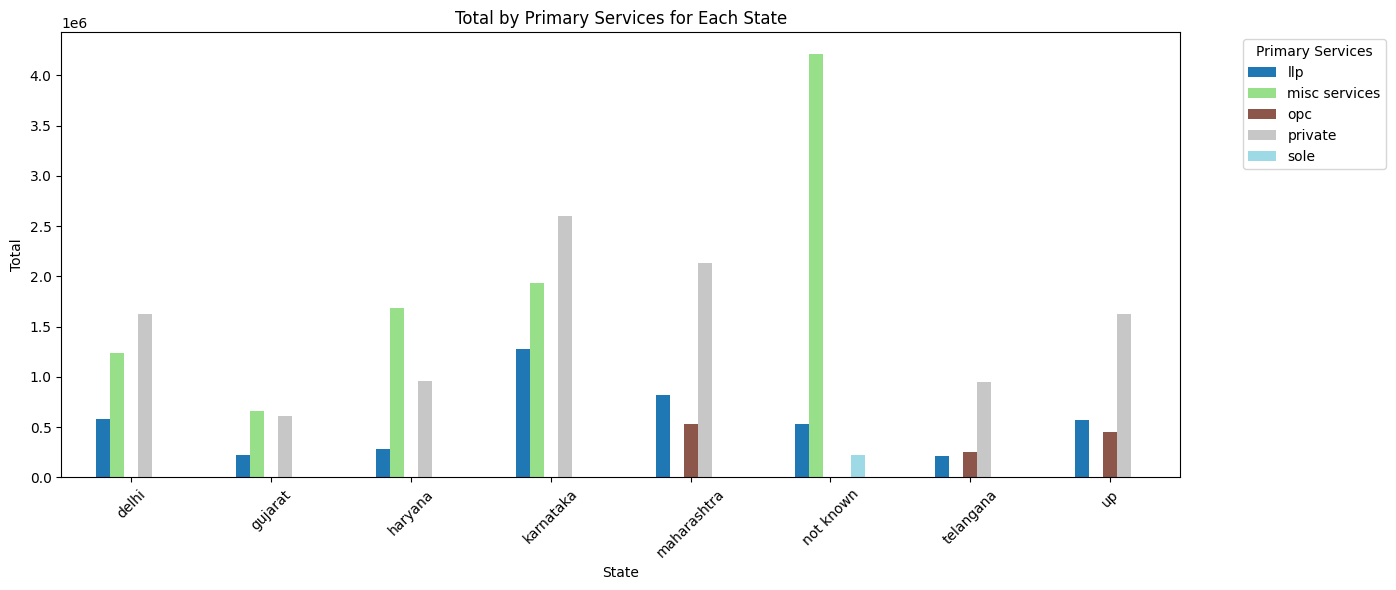

In [471]:
pivot_df = top_service_per_state.pivot(index='State', columns='Primary Services', values='Total')

pivot_df.plot(kind='bar', figsize=(12, 6), colormap='tab20')

plt.title('Total by Primary Services for Each State')
plt.xlabel('State')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Primary Services', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.show()

◘ Again for TOP 5 state miscellaneous & priva leads

◘ Commenting on 'other services' and 'primary services' will be difficult as i don't know their actual cost.

◘ we also need to know what, what these services are.... for better uderstanding.

◘ I feel analyzing ahead won't make sense , as mor info is required